# News headlines
A research at the VUB manually labeled some headlines. My first step in this research project is trying to predict those labels myself.

[News headlines](#News-headlines)<br>
[Data preparation](#Data-preparation)<br>
&emsp;[Import data](#Import-data)<br>
&emsp;[Test id for each row](#Test-id-for-each-row)<br>
&emsp;[Train-test split](#Train-test-split)<br>
[Scikit learn](#Scikit-learn)<br>
&emsp;[Feature vectors: Bag of words](#Feature-vectors%3A-Bag-of-words)<br>
&emsp;&emsp;[Tokenizing](#Tokenizing)<br>
&emsp;&emsp;[TF-IDF](#TF-IDF)<br>
&emsp;&emsp;[Classifier](#Classifier)<br>
&emsp;&emsp;[Pipeline](#Pipeline)<br>
&emsp;&emsp;[Evaluation](#Evaluation)<br>
&emsp;&emsp;&emsp;[MultinomialNB](#MultinomialNB)<br>
&emsp;&emsp;&emsp;[LinearSVC](#LinearSVC)<br>
&emsp;&emsp;&emsp;[Confusion Matrix](#Confusion-Matrix)<br>
&emsp;&emsp;[Parameter tuning: grid search](#Parameter-tuning%3A-grid-search)<br>
&emsp;[Different targets](#Different-targets)<br>
&emsp;&emsp;[Model](#Model)<br>
&emsp;&emsp;[Test all labels](#Test-all-labels)<br>
[Just simple rules](#Just-simple-rules)<br>
&emsp;[Functions](#Functions)<br>
&emsp;&emsp;[Lengte](#Lengte)<br>
&emsp;&emsp;[Vragen](#Vragen)<br>
&emsp;&emsp;[Interpunctie](#Interpunctie)<br>
&emsp;&emsp;[Lidwoorden](#Lidwoorden)<br>
&emsp;&emsp;[Cijfer](#Cijfer)<br>
&emsp;&emsp;[Citaat](#Citaat)<br>
&emsp;[Model & Evaluation](#Model-%26-Evaluation)<br>
&emsp;&emsp;[The model itself](#The-model-itself)<br>
&emsp;&emsp;[Lang](#Lang)<br>
&emsp;&emsp;[Vragen](#Vragen)<br>
&emsp;&emsp;[Interpunctie](#Interpunctie)<br>
&emsp;&emsp;[Lidwoorden](#Lidwoorden)<br>
&emsp;&emsp;[Cijfer](#Cijfer)<br>
&emsp;&emsp;[Citaat](#Citaat)<br>

# Data preparation
## Import data

In [32]:
import pandas as pd
import openpyxl  # Dependency of pandas that's not automatically installed

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
df.head()

,Test,Headline ID,Winner,Headline,Actief,Lang,Vragen,Interpunctie,Tweeledigheid,Emotie,...,Lidwoorden,Adjectieven,Eigennamen,Betrekking,Voor+Achternaam,Cijfers,Quotes,Wat zit erin voor mij?,Modaliteit,Sensatie
0,1,A,False,Barack en Michelle Obama laten dansmoves zien ...,0,1,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
1,NaN,B,True,Barack en Michelle Obama gaan helemaal los tij...,1,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
2,2,A,True,Marc Coucke maakt opvallende keuze bij start v...,1,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
3,NaN,B,False,"Marc Coucke: ""Spelers van 10 miljoen? Neen, li...",1,0,0,0,1,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4,3,A,True,Maandag drukste dag van het jaar op Brussels A...,1,1,0,0,1,0,...,0,0,0,1,0,0,1,1.0,NaN,NaN


## Test id for each row
Currently, ownly the first row of each test has the test id. In order to group test together, let's add this id to all the rows of the test.

In [33]:
# iterate over dataframe rows, if test is NaN, set test id to previous test id
for i in range(1, len(df)):
    if pd.isna(df.iloc[i, 0]):
        df.iloc[i, 0] = df.iloc[i - 1, 0]
df.head()

,Test,Headline ID,Winner,Headline,Actief,Lang,Vragen,Interpunctie,Tweeledigheid,Emotie,...,Lidwoorden,Adjectieven,Eigennamen,Betrekking,Voor+Achternaam,Cijfers,Quotes,Wat zit erin voor mij?,Modaliteit,Sensatie
0,1,A,False,Barack en Michelle Obama laten dansmoves zien ...,0,1,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
1,1,B,True,Barack en Michelle Obama gaan helemaal los tij...,1,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
2,2,A,True,Marc Coucke maakt opvallende keuze bij start v...,1,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN
3,2,B,False,"Marc Coucke: ""Spelers van 10 miljoen? Neen, li...",1,0,0,0,1,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4,3,A,True,Maandag drukste dag van het jaar op Brussels A...,1,1,0,0,1,0,...,0,0,0,1,0,0,1,1.0,NaN,NaN


## Train-test split

In [34]:
# split dataframe into train and test
from sklearn.model_selection import train_test_split

# TODO: For some of the attributes, the values need to be grouped by test id before splitting.
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.head()

,Test,Headline ID,Winner,Headline,Actief,Lang,Vragen,Interpunctie,Tweeledigheid,Emotie,...,Lidwoorden,Adjectieven,Eigennamen,Betrekking,Voor+Achternaam,Cijfers,Quotes,Wat zit erin voor mij?,Modaliteit,Sensatie
374,143,A,False,Palma maakt komaf met 'onhandelbaar gedrag' va...,1,1,0,1,1,0,...,0,1,0,0,0,0,0,NaN,NaN,NaN
105,43,B,True,"Brandweer moet elke dag zeedijk afspuiten: ""Ze...",1,0,0,0,1,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
1924,769,B,True,"Marjolein uit 'Blind Getrouwd': ""Ze schreven d...",1,1,0,0,0,1,...,0,0,1,0,0,0,1,NaN,NaN,NaN
121,49,B,False,Het tragische verhaal van Demi Lovato: wereldw...,1,1,0,0,1,1,...,1,1,0,0,1,0,0,NaN,NaN,NaN
173,69,B,True,Een boze buur schreef een briefje over de romm...,1,1,0,0,0,0,...,1,0,0,0,0,0,0,NaN,NaN,NaN


# Scikit learn
Note that a lot of the code below is from [this tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

## Feature vectors: Bag of words
The text must be transformed into numerical feature vectors to use classic machine learning algorithms.

### Tokenizing
> Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_headlines = train.loc[:, "Headline "]
# All of those headlines get converted to a feature vector, the rows represent the different headlines, the columns represent how many times a certain word appears in that headline
X_train_counts = count_vect.fit_transform(train_headlines)
print(f"df_shape={train.shape}; x_train_counts_shape={X_train_counts.shape}")

df_shape=(1805, 22); x_train_counts_shape=(1805, 5171)


### TF-IDF
Longer documents will have a higher count. This problem can be solved by using the word frequency instead of the word count. The weight of words that occur in many documents will also be downscaled in tf-idf.

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1805, 5171)

### Classifier
I'm using Multinomial Naive Bayes, since this is one of the most suitable for word counts, accoording to the tutorial.

In [37]:
from sklearn.naive_bayes import MultinomialNB

train_target = train.loc[:, "Actief"]  # Let's first try to predict whether given headline is active (doing something)
clf = MultinomialNB().fit(X_train_tfidf, train_target)

> To try to predict the outcome on a new document we need to extract the features using almost the same feature extracting chain as before. The difference is that we call transform instead of fit_transform on the transformers, since they have already been fit to the training set

In [38]:
docs_new = ["Proximus denkt aan eigen Belgische Netflix",  # Should be labeled passive
            "Proximus werkt aan eigen Belgische Netflix",  # Should be labeled active
            "Dat is schrikken: man verlaat zijn woning en komt prompt oog in oog te staan met zwarte beer",  # active
            "Jongeman denkt zijn hond buiten te horen, maar als hij gaat kijken, wacht een onaangename verrassing",
            # passive
            ]

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print(f"{doc} => {category}")

Proximus denkt aan eigen Belgische Netflix => 1
Proximus werkt aan eigen Belgische Netflix => 1
Dat is schrikken: man verlaat zijn woning en komt prompt oog in oog te staan met zwarte beer => 1
Jongeman denkt zijn hond buiten te horen, maar als hij gaat kijken, wacht een onaangename verrassing => 1


It predicts all of them as active, which isn't really what I was hoping for.

### Pipeline
Put the steps together to create a pipeline.

In [39]:
from sklearn.pipeline import Pipeline, FeatureUnion

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
text_clf.fit(train_headlines, train_target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

### Evaluation
#### MultinomialNB

In [40]:
import numpy as np

test_headlines = test.loc[:, "Headline "]
target_test = test.loc[:, "Actief"]

In [41]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
text_clf.fit(train_headlines, train_target)

predicted_mnb = text_clf.predict(test_headlines)
print(f"Accurate prediction ratio: {np.mean(predicted_mnb == target_test)}")

Accurate prediction ratio: 0.8451327433628318


#### LinearSVC

In [42]:
from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf.fit(train_headlines, train_target)
predicted_svc = text_clf.predict(test_headlines)
print(f"Accurate prediction ratio: {np.mean(predicted_svc == target_test)}")

Accurate prediction ratio: 0.8495575221238938


#### Confusion Matrix

Confusion matrix for predicted_mnb:
              precision    recall  f1-score   support

     Passief       1.00      0.01      0.03        71
      Actief       0.84      1.00      0.92       381

    accuracy                           0.85       452
   macro avg       0.92      0.51      0.47       452
weighted avg       0.87      0.85      0.78       452



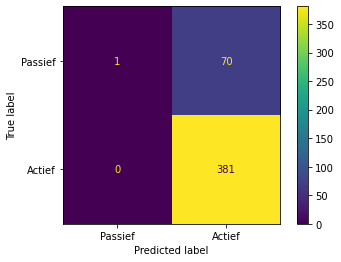

In [43]:
from sklearn import metrics

print("Confusion matrix for predicted_mnb:")
print(metrics.classification_report(target_test, predicted_mnb,
                                    target_names=["Passief", "Actief"]))
cm_mnb = metrics.confusion_matrix(target_test, predicted_mnb)
metrics.ConfusionMatrixDisplay.from_predictions(target_test, predicted_mnb, display_labels=["Passief", "Actief"])

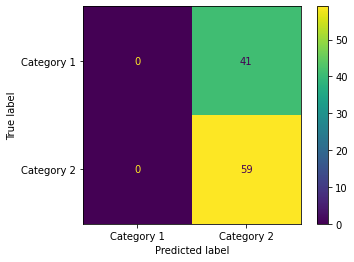

In [44]:
# Quick check whether confusion matrix is actually working
import numpy as np

# Create numpy vector with random 1 or 0
y_test = np.random.randint(2, size=100)
# Get most occuring element in y_test
y_test_mode = np.bincount(y_test).argmax()
# create a vector with the most occuring element in y_test, this are my predictions
y_pred = np.full(len(y_test), y_test_mode)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Category 1", "Category 2"])

Confusion matrix for predicted_svc:
              precision    recall  f1-score   support

     Passief       1.00      0.04      0.08        71
      Actief       0.85      1.00      0.92       381

    accuracy                           0.85       452
   macro avg       0.92      0.52      0.50       452
weighted avg       0.87      0.85      0.79       452



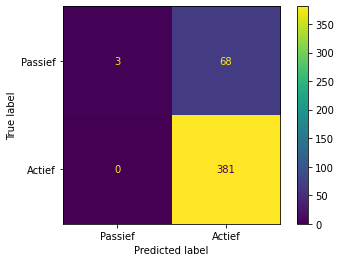

In [45]:
print("Confusion matrix for predicted_svc:")
print(metrics.classification_report(target_test, predicted_svc,
                                    target_names=["Passief", "Actief"]))
cm_svc = metrics.confusion_matrix(target_test, predicted_svc)
metrics.ConfusionMatrixDisplay.from_predictions(target_test, predicted_svc, display_labels=["Passief", "Actief"])

We can see the precission-recall tradeoff. For "Actief", we have a perfect precission (1.00), but a horrible recall (0.04). When plotting the confusion matrix, you can clearly see that almost everything gets predicted as "Actief".

### Parameter tuning: grid search

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e20, 1e15, 1e10, 1e5, 1e0, 1e-1, 1e-2, 1e-3, 1e-4),
}
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)  # Use all available CPU cores
gs_clf = gs_clf.fit(train_headlines[:400], train_target[:400])  # Search on smaller subset to speed up training

In [47]:
# Check the best score and the parameters related to it
# Note that the scores might be different, since we are using a small subset of the data
print(gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

0.835
clf__alpha: 1e+20
tfidf__use_idf: True
vect__ngram_range: (1, 1)


## Different targets
We used the "Actief" column as target up to now, but we also have some other data to precict.
### Model

In [48]:
def get_attribute_column(attribute, use_train=True):
    data = train if use_train else test
    return data.loc[:, attribute]


def get_fitted_model(train_data, train_target):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                              alpha=1e-3, random_state=42,
                              max_iter=10, tol=None)),
    ])
    text_clf.fit(train_data, train_target)
    return text_clf


def get_predictions(model, test_data):
    return model.predict(test_data)


def train_and_get_confusion_matrix(data_column, model=None):
    train_headlines = get_attribute_column("Headline ", use_train=True)
    train_target = get_attribute_column(data_column, use_train=True)

    test_headlines = get_attribute_column("Headline ", use_train=False)
    test_target = get_attribute_column(data_column, use_train=False)

    model = get_fitted_model(train_headlines, train_target) if model is None else model
    predicted = get_predictions(model, test_headlines)

    metrics.ConfusionMatrixDisplay.from_predictions(test_target, predicted,
                                                    display_labels=[f"{data_column} 0", f"{data_column} 1"])

### Test all labels

In [49]:
columns = list(df.columns)
skip_columns = ["Test ", "Headline ID", "Headline ", "Wat zit erin voor mij? ", "Modaliteit ", "Sensatie"]
for column in skip_columns:
    assert column in columns
    columns.remove(column)
    assert column not in columns
columns

['Winner',
 'Actief',
 'Lang',
 'Vragen',
 'Interpunctie',
 'Tweeledigheid',
 'Emotie',
 'Voorwaartse Verwijzing ',
 'Signaalwoorden',
 'Lidwoorden',
 'Adjectieven',
 'Eigennamen',
 'Betrekking',
 'Voor+Achternaam',
 'Cijfers',
 'Quotes']

Training Winner
Training Actief
Training Lang
Training Vragen
Training Interpunctie
Training Tweeledigheid
Training Emotie
Training Voorwaartse Verwijzing 
Training Signaalwoorden
Training Lidwoorden
Training Adjectieven
Training Eigennamen
Training Betrekking
Training Voor+Achternaam
Training Cijfers
Training Quotes


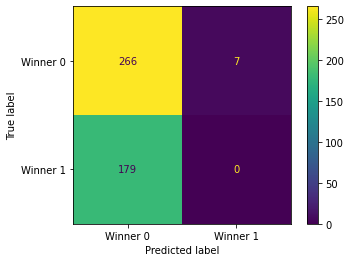

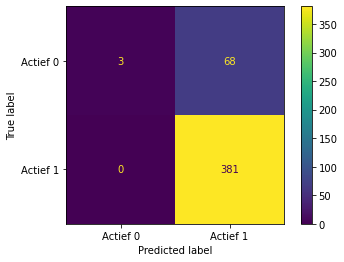

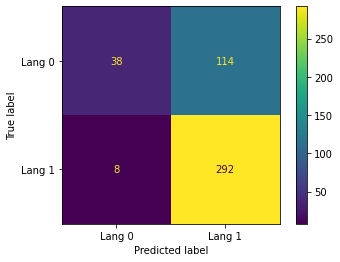

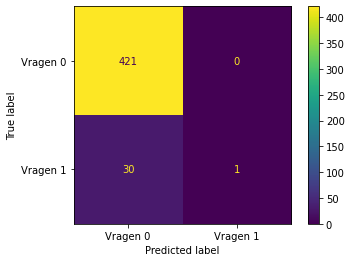

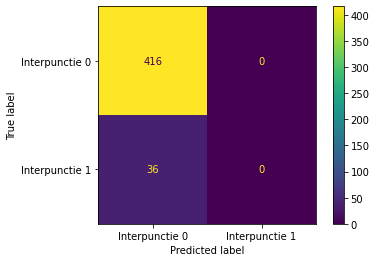

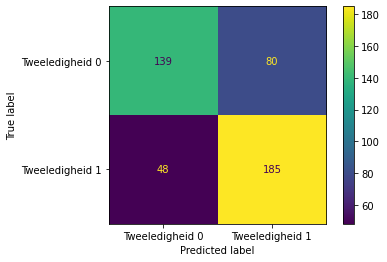

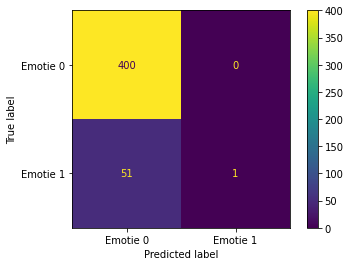

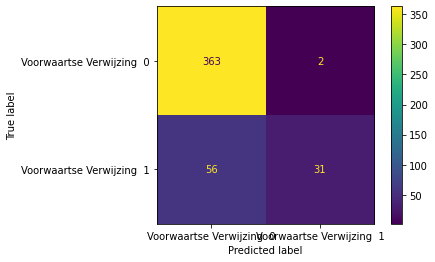

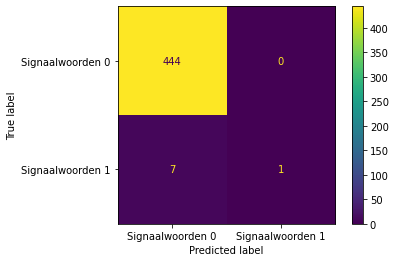

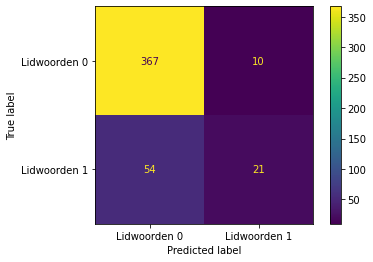

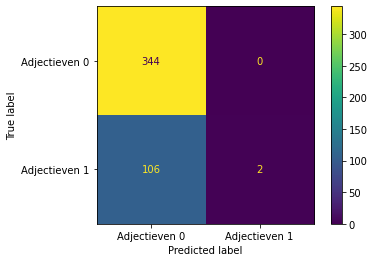

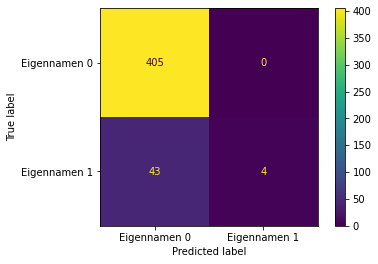

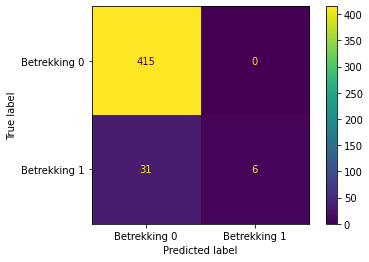

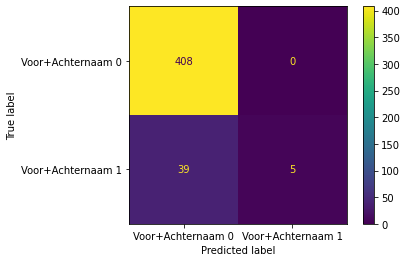

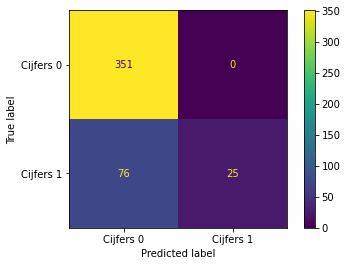

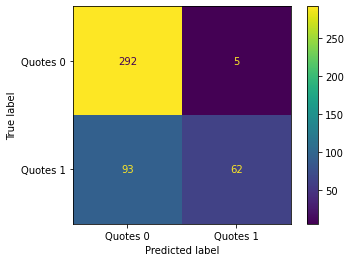

In [50]:
for label in columns:
    print(f"Training {label}")
    train_and_get_confusion_matrix(label)

It isn't producing good results for any of the labels, so let's try to improve it label per label.

# Just simple rules
Some of the labels don't need any complex algorithms, they can just be calculated by a simple function (based on their description in the paper).

## Functions
### Lengte
> Lange titels zouden beter werken dan korte, omdat
ze meer informatie kunnen doorspelen via de kop
aan de lezers. Onder korte koppen verstaan we in
deze studie krantenkoppen die minder dan 76 tekens
(inclusief spaties) bevatten. Lange krantenkoppen
zijn dan koppen die uit 76 of meer tekens bestaan.

In [51]:
def is_long_headline(headline):
    return len(headline) >= 76


print(is_long_headline("Doel: Vandeput een hak zetten. Resultaat: Crombez in z'n hemd gezet"))
print(is_long_headline(
    "Vermoedelijk vervalste mails brengen Crombez (SP.A) in verlegenheid: \"Ik had ze beter niet gebruikt\""))

False
True


### Vragen
> Vragen in krantenkoppen zouden beter werken
omdat ze lezers aan het denken zetten; mensen
worden nieuwsgierig naar de inhoud van het artikel
omdat ze een antwoord op de gestelde vraag willen
verkrijgen.

In [52]:
def contains_question(headline):
    return "?" in headline


print(contains_question("Een derde van de films in de cinema’s zijn prequels of sequels: hoe komt dat?"))

True


### Interpunctie
> Met uitroeptekens (1) willen journalisten sterke
emoties opwekken bij de lezers waardoor ze zouden
getriggerd zijn om te klikken. Door beletseltekens (2)
te gebruiken zorgen journalisten dan weer voor een
cliffhanger-gevoel bij de lezers. Aanhalingstekens (3)
kunnen ofwel betekenen dat er een citaat in de kop
staat of dat er een aanname wordt gemaakt. Bij
interpunctie kijken we alleen naar aanhalingstekens
die dienen als aanname.

In [53]:
def contains_interpunct(headline):
    return "!" in headline or "..." in headline or headline.count("'") >= 2


print(contains_interpunct("Bestuurder rijdt 3 kilometer (!) achteruit \"door defect\" en legt positieve drugstest af"))
print(contains_interpunct("Deze man rijdt letterlijk zijn gras af, maar of dat nu de meeste effectieve manier is..."))
print(contains_interpunct("Deze vijfjarige is 'het mooiste meisje op Instagram'"))

True
True
True


### Lidwoorden
>  Lidwoorden worden tegenwoordig nog steeds
weggelaten uit krantenkoppen. In de analyse wordt
er enkel gekeken naar lidwoorden die kunnen
weggelaten worden; we nemen dus vaste clusters
(bv. uit de biecht klappen, uit de hand lopen, het
wordt, enz.) en lidwoorden in quotes niet op in de
analyse.

In [54]:
def contains_article_word(headline):
    return "de" in headline or "het" in headline or "een" in headline


print(contains_article_word(
    "Arrestant klimt op dak van rijdende politiewagen, maar agent heeft de oplossing: gewoon doorrijden"))

True


### Cijfer
> Het gebruik van cijfers in koppen maakt de inhoud
van het artikel voorspelbaar voor de lezers. Het geeft
hen zekerheid waardoor ze weten wat ze kunnen
verwachten. Cijfers kunnen krantenkoppen
interessanter maken, vooral wanneer het gaat om
grote getallen (1). Ook kunnen cijfers inspelen op de
gevoelens van mensen door bijvoorbeeld de leeftijd
weer te geven (2).

In [188]:
def contains_number_word(headline):
    # Note: I didn't write this entire list all by myself, it was suggested by GitHub Co-Pilot
    numbers = ["één", "twee", "drie", "vier", "vijf", "zes", "zeven", "acht", "negen", "tien", "elf", "twaalf",
               "dertien", "veertien", "vijftien", "zestien", "zeventien", "achttien", "negentien", "twintig", "dertig",
               "veertig", "vijftig", "zestig", "zeventig", "tachtig", "negentig", "honderd", "duizend", "miljoen",
               "miljard", "biljoen", "biljard",
               "triljoen"]  #, "triljard", "quadriljoen", "quadriljard", "quintiljoen", "quintiljard", "sextiljoen", "sextiljard", "septiljoen", "septiljard", "octiljoen", "octiljard", "noniljoen", "noniljard", "deciljoen", "deciljard", "undeciljoen", "undeciljard", "duodeciljoen", "duodeciljard", "tredeciljoen", "tredeciljard", "quattuordeciljoen", "quattuordeciljard", "quindeciljoen", "quindeciljard", "sexdeciljoen", "sexdeciljard", "septendeciljoen", "septendeciljard", "octodeciljoen", "octodeciljard", "novemdeciljoen", "novemdeciljard", "vigintiljoen", "vigintiljard", "unvigintiljoen", "unvigintiljard", "duovigintiljoen", "duovigintiljard", "trevigintiljoen", "trevigintiljard", "quattuorvigintiljoen", "quattuorvigintiljard", "quinquavigintiljoen", "quinquavigintiljard", "sexvigintiljoen", "sexvigintiljard", "septenvigintiljoen",
    headline = headline.lower().split()
    for number in numbers:
        if number in headline:
            return True
    return False


def contains_number(headline):
    # TODO? This doesn't check numbers written as text (e.g. "five")
    return any(char.isdigit() for char in headline)  # or contains_number_word(headline)

def contains_number_or_number_word(headline):
    return contains_number(headline) or contains_number_word(headline)

print(contains_number(
    "Iedereen dacht dat 313 kinderen ziek werden door zijn lasagne, maar dat klopt niet: \"Wat dan wél?\""))
print(contains_number("Kranige oma (93) bewijst dat er op angst overwinnen geen leeftijd staat"))

True
True


### Citaat
> Een citaat benadrukt een belangrijk deel van het
artikel, waardoor het de lezers prikkelt om ook het
achterliggende verhaal te willen lezen.

In [56]:
def contains_quote(headline):
    return "\"" in headline


print(contains_quote("Pakkende getuigenis van ex-gevangene: \"In de cel hingen de muren vol stront\""))

True


## Model & Evaluation
### The model itself

In [57]:
class SimpleFunctionModel(object):
    def __init__(self, function):
        self.function = function

    def predict(self, headlines):
        # Apply self.function to each of the elements in headlines
        return np.vectorize(self.function)(headlines)

### Lang

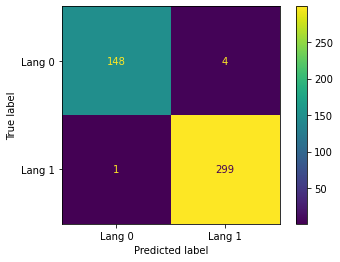

In [58]:
train_and_get_confusion_matrix("Lang", model=SimpleFunctionModel(is_long_headline))

This model is a lot better, but there are still a few (4) wrong predictions. Let's check what the wrong results are.

In [59]:
def get_wrong_predictions(predictions, target_predictions, headlines):
    wrong_predictions = []
    target_predictions = np.array(target_predictions)
    headlines = np.array(headlines)
    for i in range(len(predictions)):
        if predictions[i] != target_predictions[i]:
            wrong_predictions.append((headlines[i], predictions[i], target_predictions[i]))
    return wrong_predictions


def predict_and_get_wrong_predictions(attribute, model):
    target = get_attribute_column(attribute, use_train=False)
    headlines = get_attribute_column("Headline ", use_train=False)
    predictions = model.predict(headlines)
    return get_wrong_predictions(predictions, target, headlines)

In [60]:
def output_wrong_predictions(attribute, model):
    wrong_predictions = predict_and_get_wrong_predictions(attribute, model)
    for headline, prediction, target in wrong_predictions[:5]:
        print(f"Predicted {prediction}, but should be {target} for {headline} (length {len(headline)})")
    if len(wrong_predictions) > 5:
        print(f"And {len(wrong_predictions) - 5} more")


output_wrong_predictions("Lang", SimpleFunctionModel(is_long_headline))

Predicted True, but should be 0 for Wat kan je doen tegen ouder worden? Martine Prenen geeft tien bruikbare tips (length 76)
Predicted True, but should be 0 for Met deze tip van David Attenborough help je uitgeputte bijen er weer bovenop (length 76)
Predicted True, but should be 0 for "Verkrachting te zwaar bestraft": bekende feministe doet opvallende uitspraken (length 78)
Predicted False, but should be 1 for Halfnaakte Kim Kardashian lijkt blij dat 'mei plasticvrij' voorbij is (length 69)
Predicted True, but should be 0 for Speelster bevestigt dat Anderlecht vrouwenploeg opdoekt, Marc Coucke ontkent (length 76)


Predicted True, but should be 0 for De bedgeheimen van Radja: "Vrouwen? Ik ben geen engel, je moet gewoon zien dat niks uitkomt" (length 92)
Predicted True, but should be 0 for Wil je de historische match van de Rode Duivels tegen Brazilië meemaken? Dit moet je weten (length 90)
Predicted False, but should be 1 for Moeten we de stekkers nog uittrekken en alle andere dingen die u moet weten over onweer (length 87)
Predicted True, but should be 0 for "Thermische vore, explosieve cyclogenese en Cumulonimbus arcus": begrijpt u nog iets van het weerbericht? (length 105)
Predicted True, but should be 0 for Valsspeler ontmaskerd? Schimmige 'Travel Club Express' houdt ermee op (length 69)
And 6 more


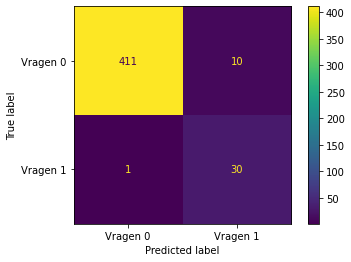

In [61]:
def get_evaluation(attribute, function):
    model = SimpleFunctionModel(function)
    train_and_get_confusion_matrix(attribute, model=model)
    output_wrong_predictions(attribute, model)


get_evaluation("Vragen", contains_question)

There is still a question without a question mark. Most of the false positives are retorical questions.

### Interpunctie

Predicted True, but should be 0 for Horrorfilm 'Hereditary' is zo griezelig dat kijkers na afloop noodnummer kunnen bellen (length 86)
Predicted True, but should be 0 for Kevin en Megan weer samen na 'Temptation Island', "tot hij seks had met een hippie" (length 83)
Predicted False, but should be 1 for Links afslaan: hier mocht het wel én niet (length 41)
Predicted False, but should be 1 for "De man die Weinstein begroef" moet nu zelf opstappen (en dat vindt het Trump-kamp geweldig) (length 92)
Predicted True, but should be 0 for Mike uit 'Blind Getrouwd' stapt in de politiek (length 46)
And 36 more


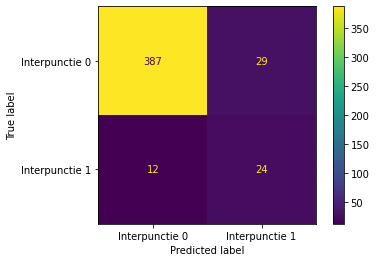

In [62]:
get_evaluation("Interpunctie", contains_interpunct)

### Lidwoorden

Predicted True, but should be 0 for De man die weigert te wijken voor nieuwe kustflats: "Ik verlaat mijn huisje alleen in een kist" (length 95)
Predicted True, but should be 0 for Frontale crash combi en politievoertuig: inbrekers kunnen ontkomen na wilde achtervolging (length 89)
Predicted True, but should be 0 for Vlaamse duiker over redding Thaise voetballers: "Grootste vrees is dat de maskers gaan lekken" (length 94)
Predicted True, but should be 0 for Auto ramt gebouw De Telegraaf en vliegt in brand: "Dit is een aanslag, maar wij laten ons niet intimideren" (length 107)
Predicted True, but should be 0 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
And 281 more


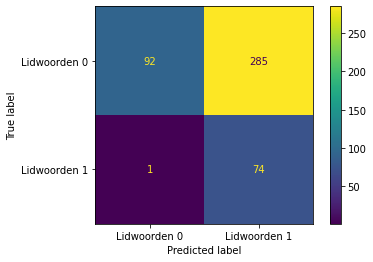

In [63]:
get_evaluation("Lidwoorden", contains_article_word)

The current function checks for all articles, while the reserch only counted articles that could be omitted, so there are a lot of false positives.
### Cijfer

Predicted True, but should be 0 for Met welke Rode Duivels kunnen we verder en met wie niet? Deze defensie haalt 2022 niet (length 86)
Predicted False, but should be 1 for Vlaamse steden zetten zich schrap voor "risicomatch" Marokko-Iran: "Vierhonderd extra agenten klaar" (length 100)
Predicted True, but should be 0 for "Hij heeft al die tijd amper gegeten of gedronken." Luc, een man met beperking, doolde vier dagen lang moederziel alleen door Londen (length 132)
Predicted True, but should be 0 for Hoe vermiste Vlaming met beperking vier dagen moederziel alleen overleefde in hartje Londen (length 91)
Predicted True, but should be 0 for Volle Lijnbus rijdt met deuren open: "Op sommige plaatsen reden we tot 90 kilometer per uur" (length 92)
And 19 more


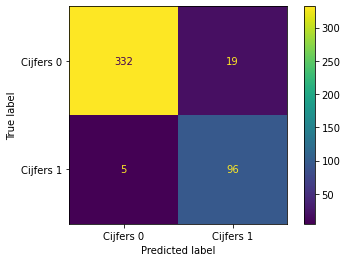

In [189]:
get_evaluation("Cijfers", contains_number_or_number_word)

### Citaat

Predicted True, but should be 0 for Nieuwe partij gaat voor gelijkheid van toiletten en zoekt "excuusmannen" (length 72)
Predicted True, but should be 0 for Stranden populaire vakantiebestemming overspoeld door "monsterachtige" kwallen (length 78)
Predicted True, but should be 0 for "De man die Weinstein begroef" moet nu zelf opstappen (en dat vindt het Trump-kamp geweldig) (length 92)
Predicted True, but should be 0 for Auto ramt gevel van Nederlandse krant De Telegraaf: "Aanslag" (length 61)
Predicted True, but should be 0 for Reusachtig "monster" zaait paniek onder toeristen in populaire badplaats (length 72)
And 9 more


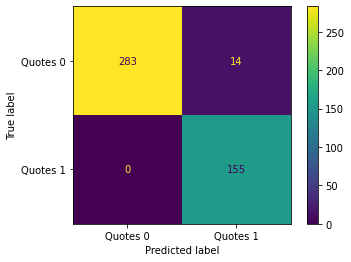

In [65]:
get_evaluation("Quotes", contains_quote)

# Focus on label per label
Up to now, I tried to find a general approach for all of the labels, but because of the large differences in types of labels (e.g. length vs emotion), I'll try to get a seperate model per label.

## Actief
### Details
#### Meaning
> Een actieve of passieve constructie wijst op de vorm die  het  werkwoord  aanneemt  in  de  zin.  Er  zouden eerder   actieve   constructies   worden   gebruikt   in koppen, dan passieve.Ook   verstaan   we   in   deze   studie   onder   actieve constructies koppen die directer overkomen dan hun concurrentie, die misschien wat meer omslachtig is.Bij  een  directe  kop  staat  het  hoofdnieuws  van  het artikel vooraan, een indirectere kop geeft eerst nog watalgemene of onbeduidende informatie.
#### Example
> Actief: Weg met perfectie: H&M werktde kleine details van bikinimodellen niet langer weg
> Passief:  Weg  met  perfectie:  striemen,  beharing en littekens     van badpakmodellen H&M (worden) niet langer gefotoshopt
> Directer: Proximus werktaan  eigen  Belgische Netflix
> Indirecter: Proximus denktaan  eigen  Belgische Netflix
### Past paricle
A passive construction will often contain a past particle, so it might be useful to train a model to search for those. However, this won't be an ideal scenario, since more indirect forms (like the one given above using "to think") will be ignored with this.
In the English language, we have following markers for a passive construction: be, -ed and by ([src](https://www.academypublication.com/issues/past/jltr/vol01/06/32.pdf), Classification and SLA Studies of Passive Voice, Yuanying Wang). This translates in dutch to forms of "worden", "ge-" and "door".


In [66]:
def is_passive(headline):
    # Check if any word in headline start with "ge"
    for word in headline.split():
        if word.startswith("ge") or word.startswith("Ge"):
            return True
        if word == "door" or word == "Door":
            return True
        if "word" in word or word in ["zijn", "is", "ben", "bent"]:  # Check for any form of the verb "worden"
            return True
    return False


def is_active(headline):
    return not is_passive(headline)


print(is_passive("Verdachte gevlucht na overval"))

True


Predicted False, but should be 1 for Joël eert overleden vrouw met zijn tuin: meer dan 800 planten en een verborgen droomhuisje (length 90)
Predicted False, but should be 1 for Auto ramt gebouw De Telegraaf en vliegt in brand: "Dit is een aanslag, maar wij laten ons niet intimideren" (length 107)
Predicted False, but should be 1 for De maat is vol: banken nemen maatregelen na zoveelste plofkraak in korte tijd (length 77)
Predicted False, but should be 1 for Deze man heeft echt geen zin om het gras te maaien, maar of zijn oplossing nu zo handig is... (length 93)
Predicted False, but should be 1 for Net gewone mensen: Beyoncé en Jay Z delen vakantiefoto's (length 56)
And 186 more


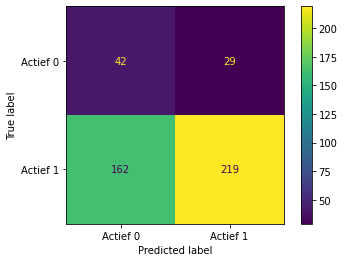

In [67]:
get_evaluation("Actief", is_active)

Too much words starting with "Ge-" (e.g. Geen,gewoon, gebouw, ...) are seen as passive indications, even though they aren't. Let's try without the "ge-" prefix detection.

Predicted False, but should be 1 for Joël eert overleden vrouw met zijn tuin: meer dan 800 planten en een verborgen droomhuisje (length 90)
Predicted False, but should be 1 for Auto ramt gebouw De Telegraaf en vliegt in brand: "Dit is een aanslag, maar wij laten ons niet intimideren" (length 107)
Predicted True, but should be 0 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
Predicted False, but should be 1 for De maat is vol: banken nemen maatregelen na zoveelste plofkraak in korte tijd (length 77)
Predicted False, but should be 1 for Deze man heeft echt geen zin om het gras te maaien, maar of zijn oplossing nu zo handig is... (length 93)
And 131 more


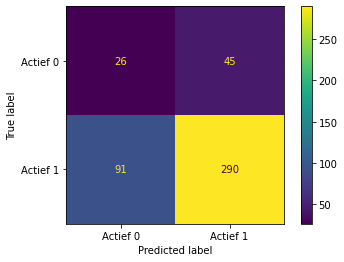

In [68]:
def is_active_no_ge_prefix(headline):
    # Check if any word in headline start with "ge"
    for word in headline.split():
        if word == "door" or word == "Door":
            return False
        if "word" in word or word in ["zijn", "is", "ben", "bent"]:  # Check for any form of the verb "worden"
            return False
    return True


get_evaluation("Actief", is_active_no_ge_prefix)

Still not good, try checking words starting with ge- and ending with -d (still only regular past particle forms then).

Predicted False, but should be 1 for Joël eert overleden vrouw met zijn tuin: meer dan 800 planten en een verborgen droomhuisje (length 90)
Predicted False, but should be 1 for Auto ramt gebouw De Telegraaf en vliegt in brand: "Dit is een aanslag, maar wij laten ons niet intimideren" (length 107)
Predicted True, but should be 0 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
Predicted False, but should be 1 for De maat is vol: banken nemen maatregelen na zoveelste plofkraak in korte tijd (length 77)
Predicted False, but should be 1 for Deze man heeft echt geen zin om het gras te maaien, maar of zijn oplossing nu zo handig is... (length 93)
And 133 more


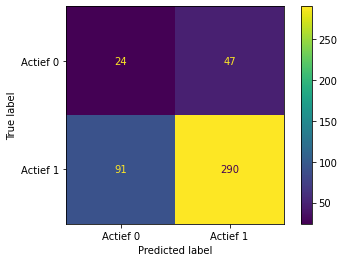

In [69]:
def is_active_ge_d(headline):
    # Check if any word in headline start with "ge"
    for word in headline.split():
        if (word.startswith("ge") or word.startswith("Ge")) and word.endswith("d"):
            return True
        if word == "door" or word == "Door":
            return False
        if "word" in word or word in ["zijn", "is", "ben", "bent"]:  # Check for any form of the verb "worden"
            return False
    return True


get_evaluation("Actief", is_active_ge_d)

Almost no difference, slightly worse. A lot of false passives are because of the word "is", let's see what dropping that condition gives us:

Predicted True, but should be 0 for Vlaamse duiker over redding Thaise voetballers: "Grootste vrees is dat de maskers gaan lekken" (length 94)
Predicted True, but should be 0 for Twaalf graden kouder aan zee: geen zomer in hele land (length 53)
Predicted True, but should be 0 for Cannabiskweker, ex-model en dronkaard: de familie van Meghan die niet uitgenodigd is op de trouw (length 96)
Predicted True, but should be 0 for Wat krijg je als je een actieve vulkaan combineert met een wervelwind? Spectaculaire beelden (length 92)
Predicted False, but should be 1 for Nieuwe partij gaat voor gelijkheid van toiletten en zoekt "excuusmannen" (length 72)
And 79 more


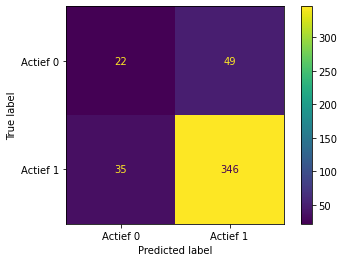

In [70]:
def is_active_no_is(headline):
    # Check if any word in headline start with "ge"
    for word in headline.split():
        if (word.startswith("ge") or word.startswith("Ge")) and word.endswith("d"):
            return False
        if word == "door" or word == "Door":
            return False
        if "word" in word or word in ["ben", "bent"]:  # Check for any form of the verb "worden"
            return False
    return True


get_evaluation("Actief", is_active_no_is)

Slightly better, but still not optimal.

## Lang
Clear description (#chars > 76), so good results with rule manually implemented. (see above)

## Vragen
Questions are easily recognizable because of a question mark, giving quite good results. (see above)

## Interpunctie
Also a simple check for the different interpunction characters (!, '*' and ...) works quite good. (see above)


## Tweeledigheid
### Details
#### Meaning
> Titels die bestaan uit twee delen; meestal bestaan ze uit  een  gewone  kopaan  de  ene  kant  en  een  quote aan de andere kant, dit tweede deel kan echter ook gewoon wat extra uitleg zijn. De twee delen worden meestal gescheiden door een dubbelpunt, maar kan ook gewoon door een punt.
#### Example
> Amper  schaduw,  geen  voedsel  of  water: baasje laat hond aan lot over ondanks hittegolf
### Manual rule
We can simply implement this rule manually, by looking at a column (:) or a (".") somewhere in the headline. Note that we also need to check it's actually "." and not "..."



Predicted True, but should be 0 for Frontale crash combi en politievoertuig: inbrekers kunnen ontkomen na wilde achtervolging (length 89)
Predicted True, but should be 0 for Deze man heeft echt geen zin om het gras te maaien, maar of zijn oplossing nu zo handig is... (length 93)
Predicted True, but should be 0 for Dit verandert allemaal vanaf vandaag: tunnel gaat maanden dicht, dokters, zelfrijdende auto's,... (length 97)
Predicted True, but should be 0 for Cannabiskweker, ex-model en dronkaard: de familie van Meghan die niet uitgenodigd is op de trouw (length 96)
Predicted False, but should be 1 for Wat krijg je als je een actieve vulkaan combineert met een wervelwind? Spectaculaire beelden (length 92)
And 25 more


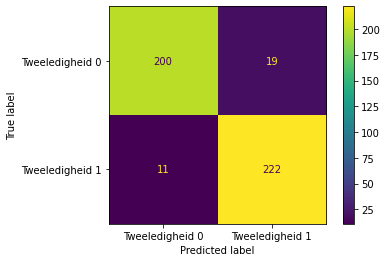

In [71]:
def count_occurrences(string, sub):
    # Util function, count #times sub occurs in string, generated using GitHub Copilot
    count = start = 0
    while True:
        start = string.find(sub, start) + 1
        if start > 0:
            count += 1
        else:
            return count


def contains_two_lids(headline):
    return ": " in headline or (
            "." in headline and count_occurrences(headline, ".") * 3 != count_occurrences(headline, "..."))


get_evaluation("Tweeledigheid", contains_two_lids)

## Emotie
### Details
#### Meaning
> Door  woorden  met  een  emotionele  connotatie  te kiezen,word  de  morele  gevoeligheid  van  de  lezers geprikkeld,  waardoor  ze  het  achterliggende  verhaal en  diens  details  willen  kennen.  Verwijzingen  naar emoties beïnvloeden de affectieve waarneming van de lezers en activerenzo gevoelens die vervolgens de aandacht  van  de  lezers  trekken.  Er  wordt  dus  via woorden  op  de  gemoedstoestand  van  de  lezers ingespeeld, bijvoorbeeld triestheid,boosheid, verontwaardiging, ...
#### Example
> Het *tragische* verhaal van Demi Lovato: wereldwijd *aanbeden*,maar *gelukkig* werd ze nooit

### Approach 1: EmoRoBerta
[EmoRoBERTa](https://huggingface.co/arpanghoshal/EmoRoBERTa) is a model used for emotion classification, but the problem with a lot of pre trained models, just like this one is that it's trained for English senteces.


In [72]:
import tensorflow as tf
# Code copied from https://huggingface.co/arpanghoshal/EmoRoBERTa
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis',
                   model='arpanghoshal/EmoRoBERTa')

emotion_labels = emotion("Thanks for using it.")
print(emotion_labels)

KeyboardInterrupt: 

In [ ]:
print(emotion("Grass is green."))

In [ ]:
print(emotion("Ik ben blij."))

As expected, using dutch sentences on an english model won't work of course. Let's try it with a dutch model:


In [ ]:
# based on https://translate-python.readthedocs.io/en/latest/tutorial.html
from translate import Translator

translator = Translator(from_lang="dutch", to_lang="english")
translation = translator.translate("Ik ben blij.")
print(translation)

The translation seems to be working.
Edit: The translation didn't work on longer sentences, so using googletrans instead.
Let's try it on a news headline:

In [ ]:
# from translate import Translator
# from googletrans import Translator # gtrans
from deep_translator import GoogleTranslator
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis',
                   model='arpanghoshal/EmoRoBERTa')

# translator= Translator(from_lang="dutch",to_lang="english")
# translator= Translator() # gtrans
translator = GoogleTranslator(source='nl', target='en')


def get_emotion(dutch_headline, verbose=False):
    print(dutch_headline) if verbose else None
    en_headline = translator.translate(dutch_headline)
    # en_headline = translator.translate(dutch_headline, src="nl",dest="en") # gtrans
    print(en_headline) if verbose else None
    emotion_labels = emotion(en_headline)
    return emotion_labels

In [ ]:
# test googletrans
translator.translate("Ik ben Arno.")

In [ ]:
sentence1 = "David bleef achter met 11 eurocent op zijn rekening door oplichters: \"Beschaamd om het te vertellen\""
sentence2 = "Waarom dit frituur er nu uitziet als een versterkte burcht"

In [ ]:
get_emotion(sentence1, verbose=True)

In [ ]:
get_emotion(sentence2, verbose=True)

It works and is able to classify the sentiment of the headline quite accurately. The problem is that e.g. "curiosity" gets seen as an emotion here, while it wasn't labeled as an emotion in the manually labelled dataset.

In [ ]:
def contains_emotion(headline):
    return get_emotion(headline)[0]["label"] != "neutral"

In [ ]:
get_evaluation("Emotie", contains_emotion)

Because it has to translate everything, it's a lot slower. As expected, there are quite a lot of false positives, which is probably because emotions like "Approval" or "Curiosity" are not seen as emotions in the original dataset.

### Approach 2: Bag of Words
Bag of Words (tf-idf) might also work quite well here and probably give good results, since most sentences containing an emotion will contain a word with an emotion as stem.

In [ ]:
# Retry the earlier code from above
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import numpy as np
from sklearn import metrics

train_headlines = train.loc[:, "Headline "]
train_target = train.loc[:, "Emotie"]

test_headlines = test.loc[:, "Headline "]
target_test = test.loc[:, "Emotie"]


def train_and_evaluate(pipeline):
    pipeline.fit(train_headlines, train_target)

    predicted_mnb = pipeline.predict(test_headlines)

    print("Confusion matrix for predicted_mnb:")
    print(metrics.classification_report(target_test, predicted_mnb,
                                        target_names=["Emotieloos", "Emotie"]))

    metrics.ConfusionMatrixDisplay.from_predictions(target_test, predicted_mnb, display_labels=["Emotieloos", "Emotie"])

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
train_and_evaluate(text_clf)

There were zero instances classified as "Emotie" in the test set. Let's try to add better tokenization/stemming as an attempt to improve this.

In [ ]:
# Build a pipeline with tokenization and stemming # Idea maybe for later: See if nltk gives better results? https://medium.com/@jeevanchavan143/nlp-tokenization-stemming-lemmatization-bag-of-words-tf-idf-pos-7650f83c60be

# Code partially from https://stackoverflow.com/questions/36182502/add-stemming-support-to-countvectorizer-sklearn (answer by Parth)
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem

dutch_stemmer = nltk.stem.SnowballStemmer('dutch')


class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([dutch_stemmer.stem(w) for w in analyzer(doc)])


vectorizer_s = StemmedCountVectorizer(min_df=3, analyzer="word", stop_words='dutch')

text_clf = Pipeline([
    ('vect', StemmedCountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
train_and_evaluate(text_clf)

This strangely resulted in exactly the same confusion matrix as the previous approach. Let's test whether the stemmer works:

In [ ]:
# Code from same StackOverflow article, answer from joeln
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import DutchStemmer

stemmer = DutchStemmer()
analyzer = CountVectorizer().build_analyzer()


def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))


stem_vectorizer = CountVectorizer(analyzer=stemmed_words)
print(stem_vectorizer.fit_transform(['Barack en Michelle Obama gaan helemaal los tijdens concert']))
print(stem_vectorizer.get_feature_names_out())

Try on a sentences containing an emotion

In [ ]:
stem_vectorizer = CountVectorizer(analyzer=stemmed_words)
stem_vectorizer.fit_transform(
    ['Het tragische verhaal van Demi Lovato: wereldwijd aanbeden,maar gelukkig werd ze nooit'])
print(stem_vectorizer.get_feature_names_out())

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer=stemmed_words)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
train_and_evaluate(text_clf)

Everything gets still classified as emotieloos. Let's check the distribution of the training set:

In [ ]:
train_target.head()

In [ ]:
train_target.value_counts()

There are clearly less instances of "Emotie" than "Emotieloos". Let's see what we can do to solve this.

[This article](https://www.deepwizai.com/projects/how-to-correctly-use-tf-idf-with-imbalanced-data) suggests reducing the max_features hyperparameter, but that didn't make any difference.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_clf = Pipeline([
    ('vect', TfidfVectorizer(analyzer=stemmed_words, max_features=3)),
    # e.g. 3 or 999999, it all yields the same result
    ('clf', MultinomialNB()),
])
train_and_evaluate(text_clf)

### Next attempt
 Another attempt based on [this article](https://medium.com/analytics-vidhya/re-sampling-imbalanced-training-corpus-for-sentiment-analysis-c9dc97f9eae1). A lot of the code below is from given article.

Let's start with reimporting everything, so you don't have to search the right cells to run from above.

In [ ]:
import pandas as pd
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Emotie'])

#### Evalution metrics
Let's also use f1-score for evaluation:

In [ ]:
from sklearn import metrics


def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return metrics.f1_score(valid_y, predictions)


def confusion_matrix(target_test, predicted_mnb):
    print(metrics.confusion_matrix(target_test, predicted_mnb))
    metrics.ConfusionMatrixDisplay.from_predictions(target_test, predicted_mnb, display_labels=["Emotieloos", "Emotie"])

#### Tf-Idf

In [ ]:
from nltk.stem.snowball import DutchStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

stemmer = DutchStemmer()
analyzer = CountVectorizer().build_analyzer()


def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))


stem_vectorizer = TfidfVectorizer(analyzer=stemmed_words)
stem_vectorizer.fit(df['Headline '])
xtrain_tfidf = stem_vectorizer.transform(train_x)
xvalid_tfidf = stem_vectorizer.transform(valid_x)

In [ ]:
from sklearn import linear_model, svm

accuracyORIGINAL = train_model(
    linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'), xtrain_tfidf, train_y,
    xvalid_tfidf)
print("Logistic Regression Baseline (WordLevel Tf-Idf): ", accuracyORIGINAL)
accuracyORIGINAL = train_model(svm.LinearSVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("SVM Baseline (WordLevel Tf-Idf): ", accuracyORIGINAL)

In [ ]:
clf = svm.LinearSVC().fit(xtrain_tfidf, train_y)
confusion_matrix(valid_y, clf.predict(xvalid_tfidf))

This already performs a lot better than the original approach (with MultionimalDB as classifier). The data inbalance isn't really a problem anymore here (545 labeled as Passief, 20 as Actief).

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(xtrain_tfidf, train_y)
confusion_matrix(valid_y, clf.predict(xvalid_tfidf))

In [ ]:
# Hmm, this says 0 with "Actief" as true label, might be because of some problen in my confusion matrix function, let's check
# After comment: I switched the arguments of the confusion matrix function, it works now.
confusion_matrix(valid_y, valid_y)

In [ ]:
import numpy as np

confusion_matrix(np.zeros(len(valid_y)), valid_y)  # The problem was that those arguments must be switched

Even though it already performs better (depending on how you define performance, because the total correct labels is still lower than when you would just classify everything as "Emotieloos"), let's still try the other techniques mentioned in the article.

#### Over sampling
Generate extra samples from the minority class.

##### Random
Randomly repeat some samples

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros_xtrain_tfidf, ros_train_y = ros.fit_resample(xtrain_tfidf, train_y)

clf1 = linear_model.LogisticRegression(random_state=0, solver="lbfgs", multi_class="multinomial")
accuracyROS = train_model(clf1, ros_xtrain_tfidf, ros_train_y, xvalid_tfidf)
print("LogisticRegression RandomOverSampler: ", accuracyROS)

clf2 = svm.LinearSVC()
accuracyROS = train_model(clf2, ros_xtrain_tfidf, ros_train_y, xvalid_tfidf)
print("SVM RandomOverSampler: ", accuracyROS)


In [ ]:
confusion_matrix(valid_y, clf1.predict(xvalid_tfidf))

##### SMOTE
SMOTE is a technique for generating synthetic samples from the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
sm_xtrain_tfidf, sm_train_y = sm.fit_resample(xtrain_tfidf, train_y)
clf1 = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
accuracySMOTE = train_model(clf1, sm_xtrain_tfidf, sm_train_y, xvalid_tfidf)
print("LogisticRegression SMOTE: ", accuracySMOTE)

clf2 = svm.LinearSVC()
accuracySMOTE = train_model(clf2, sm_xtrain_tfidf, sm_train_y, xvalid_tfidf)
print("SVC SMOTE: ", accuracySMOTE)

In [ ]:
confusion_matrix(valid_y, clf1.predict(xvalid_tfidf))

##### ADASYN
> The advantage of ADASYN over SMOTE is the use a weighted distribution for different minority class samples according to their level of difficulty in learning, where more synthetic data is generated for minority class samples that are harder to learn compared to those minority samples that are easier to learn.

In [ ]:
from imblearn.over_sampling import ADASYN

ad = ADASYN(random_state=0)
ad_xtrain_tfidf, ad_train_y = ad.fit_resample(xtrain_tfidf, train_y)
clf1 = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
accuracySMOTE = train_model(clf1, ad_xtrain_tfidf, ad_train_y, xvalid_tfidf)
print("LogisticRegression ADASYN: ", accuracySMOTE)

clf2 = svm.LinearSVC()
accuracySMOTE = train_model(clf2, ad_xtrain_tfidf, ad_train_y, xvalid_tfidf)
print("SVC ADASYN: ", accuracySMOTE)

In [ ]:
confusion_matrix(valid_y, clf1.predict(xvalid_tfidf))

##### BorderlineSMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

bsm = BorderlineSMOTE(random_state=0)
bsm_xtrain_tfidf, bsm_train_y = bsm.fit_resample(xtrain_tfidf, train_y)
clf1 = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
accuracySMOTE = train_model(clf1, bsm_xtrain_tfidf, bsm_train_y, xvalid_tfidf)
print("LogisticRegression BorderlineSMOTE: ", accuracySMOTE)

clf2 = svm.LinearSVC()
accuracySMOTE = train_model(clf2, bsm_xtrain_tfidf, bsm_train_y, xvalid_tfidf)
print("SVC BorderlineSMOTE: ", accuracySMOTE)

In [ ]:
confusion_matrix(valid_y, clf1.predict(xvalid_tfidf))

In [ ]:
train_y.value_counts()

#### Under sampling
This probably won't give good results, since there aren't a lot of samples, but let's still try it anyway.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, replacement=True)
rus_xtrain_tfidf, rus_train_y = rus.fit_resample(xtrain_tfidf, train_y)

accuracyrus = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
                          rus_xtrain_tfidf, rus_train_y, xvalid_tfidf)
print("LogisticRegression RandomUnderSampler: ", accuracyrus)

accuracyrus = train_model(svm.LinearSVC(), rus_xtrain_tfidf, rus_train_y, xvalid_tfidf)
print("SVC RandomUnderSampler: ", accuracyrus)

As expected no good performance. This is even worse than without under sampling.

##### NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss

for sampler in (NearMiss(version=1), NearMiss(version=2), NearMiss(version=3)):
    nm_xtrain_tfidf, nm_train_y = sampler.fit_resample(xtrain_tfidf, train_y)
    accuracysm = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
                             nm_xtrain_tfidf, nm_train_y, xvalid_tfidf)
    print(f"LR NearMiss(version={sampler.version}): {accuracysm}")

for sampler in (NearMiss(version=1), NearMiss(version=2), NearMiss(version=3)):
    nm_xtrain_tfidf, nm_train_y = sampler.fit_resample(xtrain_tfidf, train_y)
    accuracysm = train_model(svm.LinearSVC(), nm_xtrain_tfidf, nm_train_y, xvalid_tfidf)
    print(f"SVC NearMiss(version={sampler.version}): {accuracysm}")

NearMiss is also undersampling and also here worse results than the baseline.
##### Condensed Nearest Neighbour
I skipped some undersampling techniques from the article, since they don't seem to work well. This one however still seemed promissing:

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule

for sampler in (CondensedNearestNeighbour(random_state=0),
                OneSidedSelection(random_state=0),
                NeighbourhoodCleaningRule()):
    nm_xtrain_tfidf, nm_train_y = sampler.fit_resample(xtrain_tfidf,
                                                       train_y)  # keepdims=False doesn't work here, so the annoying warning persists
    accuracysm = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
                             nm_xtrain_tfidf, nm_train_y, xvalid_tfidf)
    print("LR {0}: ".format(sampler), accuracysm)
for sampler in (CondensedNearestNeighbour(random_state=0),
                OneSidedSelection(random_state=0),
                NeighbourhoodCleaningRule()):
    nm_xtrain_tfidf, nm_train_y = sampler.fit_resample(xtrain_tfidf, train_y)
    accuracysm = train_model(svm.LinearSVC(), nm_xtrain_tfidf, nm_train_y, xvalid_tfidf)
    print("SVM {0}: ".format(sampler), accuracysm)

The SVM methods are better than the baseline, but still not as good as the oversampling methods.

#### Combining Under and Over Sampling


In [ ]:
from imblearn.combine import SMOTEENN

se = SMOTEENN(random_state=0)
se_xtrain_tfidf, se_train_y = se.fit_resample(xtrain_tfidf, train_y)

accuracy = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
                       se_xtrain_tfidf, se_train_y, xvalid_tfidf)
print("LR SMOTEENN: ", accuracy)

accuracy = train_model(svm.LinearSVC(), se_xtrain_tfidf, se_train_y, xvalid_tfidf)
print("SVC SMOTEENN: ", accuracy)

In [ ]:
from imblearn.combine import SMOTETomek

se = SMOTETomek(random_state=0)
se_xtrain_tfidf, se_train_y = se.fit_resample(xtrain_tfidf, train_y)

clf1 = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
accuracy = train_model(clf1, se_xtrain_tfidf, se_train_y, xvalid_tfidf)
print("LR SMOTETomek: ", accuracy)

clf2 = svm.LinearSVC()
accuracy = train_model(clf2, se_xtrain_tfidf, se_train_y, xvalid_tfidf)
print("SVC SMOTETomek: ", accuracy)

This are the best f-scores so far (same as SMOTE oversampling for LR, for SVC BorderlineSMOTE was slightly better: 0.58333...).

In [ ]:
predictions = clf1.predict(xvalid_tfidf)
print(metrics.f1_score(valid_y, predictions))
confusion_matrix(valid_y, predictions)

See how this compares with predicting the same label for all the samples.

In [ ]:
predictions = np.zeros(len(valid_x))
print(metrics.f1_score(valid_y, predictions))
confusion_matrix(valid_y, predictions)

We're predicting more samples correct than when just predicting everything as "Emotieloos".

### BERTje
There is appearantly a dutch version of BERT. Let's see if we can use this for detecting the emotion. A lot of the code below is based on [this tutorial](https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671).

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("GroNLP/bert-base-dutch-cased")
tokenizer = BertTokenizer.from_pretrained("GroNLP/bert-base-dutch-cased")

model.summary()

Convert the data to examples:

In [ ]:
# concatenate train_x and train_y in a pandas dataframe
train_df = pd.concat([train_x, train_y], axis=1)
valid_df = pd.concat([valid_x, valid_y], axis=1)
train_df.head()

In [ ]:
def df_to_input_example(df, data_column, label_column):
    return df.apply(lambda x: InputExample(guid=None,
                                           text_a=x[data_column],
                                           text_b=None,
                                           label=x[label_column]), axis=1)


train_InputExamples = df_to_input_example(train_df, "Headline ", "Emotie")
validation_InputExamples = df_to_input_example(valid_df, "Headline ", "Emotie")

In [ ]:
import tensorflow as tf


def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    """"
    This function will tokenize the InputExample objects, then create the required input format with the tokenized objects, finally, create an input dataset that we can feed to the model.
    """
    features = []  # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,  # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True,  # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
                                                     input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )

In [ ]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)
t

In [ ]:
model.save_pretrained("bertje-emotion")
# You can get it back with following code: AutoModelForSequenceClassification.from_pretrained("path/to/model")

In [ ]:
pred_sentences = ["Familie in rouw na tragisch ongeval: Gelukkig heeft hij niet moeten afzien",
                  "Voorzitter brengt dinsdag een bezoek aan Taiwan"]

In [ ]:
def predict_emotion_bert(pred_sentences):
    tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
    tf_outputs = model(tf_batch)
    tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
    label = tf.argmax(tf_predictions, axis=1)
    label = label.numpy()
    return label

In [ ]:
predict_emotion_bert(pred_sentences)

In [ ]:
predictions = predict_emotion_bert(valid_x.to_list())
print(metrics.f1_score(valid_y, predictions))
confusion_matrix(valid_y, predictions)

## Voorwaartse verwijzingen
### Details
> Voorwaartse   verwijzingen   (1)   lokken   lezers   met succes  naar  het  artikel,omdat  ze  de  lezer  in  het ongewisse  laten.  Pas  in  het  artikel  wordt  duidelijk wat er met de voorwaartse verwijzing in de kop werd bedoeld.   Voorwaartse   verwijzingen   zijn   meestal woorden zoals dit, deze, zo, hij/zij, waarom, wie, wat, enzovoorts.In  dit  onderzoek  beschouwen  we  ook  niet  nader gespecifieerde koppen (2) als voorwaartse verwijzingen. Hiermee bedoelen we dus koppen die informatie achterhouden,waardoor bepaalde details onbekend blijven voor de lezer als ze het artikel niet lezen.
### Examples
> (1) Straffer dan Cirque du Soleil: deze actkreeg een gouden buzzer in 'America's got Talent'Vs. Dansgroep  vol  jongerenverstomt  jury  van America's Got Talent: "Ik denk dat ons leven net veranderd is"
> (2) Trump maakt    zich    belachelijktijdens "haastig" feestjeVs. Trump vergeet    tekst volksliedtijdens "haastig" feestje
### Data

In [ ]:
import pandas as pd
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Voorwaartse Verwijzing '])

In [ ]:
train_y.value_counts()

### Metrics

In [ ]:
from sklearn import metrics


def evaluate(target, predicted):
    display_labels = ['Geen voorwaartse verwijzing (Neg)', 'Voorwaartse verwijzing (Pos)']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()

### Approach 0: Always predicting most occuring class
Can give us a baseline from which to compare the results.

In [ ]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)

### Approach  1: Tf-Idf
#### Stemmer + Tf-Idf

In [ ]:
from nltk.stem.snowball import DutchStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

stemmer = DutchStemmer()
analyzer = CountVectorizer().build_analyzer()

stem_vectorizer = TfidfVectorizer(analyzer=lambda doc: (stemmer.stem(w) for w in analyzer(doc)))
stem_vectorizer.fit(df['Headline '])

xtrain_tfidf = stem_vectorizer.transform(train_x)
xvalid_tfidf = stem_vectorizer.transform(valid_x)

#### Imbalance
Also quite imbalanced data. Let's immediately try SMOTETomek to balance it.

In [ ]:
from imblearn.combine import SMOTETomek

st = SMOTETomek(random_state=0)
st_xtrain_tfidf, st_train_y = st.fit_resample(xtrain_tfidf, train_y)

#### LR

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(st_xtrain_tfidf, st_train_y)
predictions = clf.predict(xvalid_tfidf)

evaluate(valid_y, predictions)

#### SVC

In [ ]:
from sklearn import svm

clf = svm.LinearSVC(random_state=0)
clf.fit(st_xtrain_tfidf, st_train_y)
predictions = clf.predict(xvalid_tfidf)

evaluate(valid_y, predictions)

Since I don't really have a good intuition on f1-scores, I took a look at [this article](https://stephenallwright.com/good-f1-score/). A f-score of 0.56 is OK.

### Approach 2: Daniel Siahaan, Izzatul Umami
Siahaan, D., & Umami, I. (2012). Natural language processing for detecting forward reference in a document. IPTEK The Journal for Technology and Science, 23(4).

There are Meyer's seven since when writing software requirements. One of those sins are forward references. Given paper describes methods for detecting those forward references with NLP. "Forward reference refers to a first appearance of a term in passage which precedes it's definition". This paper is focussed on definitions of elements (by looking for used elements and linking it to their definition), so not relevant for our use case, since our forward are more of the form "Deze", "Tips" ... and not definitions of complicated words as forward definition. It works by checking whether a word is common knowledge (using Wikipedia) and if it's not common knowledge, it checks whether there is a definition in the text (and definitions have often a standard format in sentence parsing).

### Approach 3: Clickbait-based papers
Agrawal, A. (2016, October). Clickbait detection using deep learning. In 2016 2nd international conference on next generation computing technologies (NGCT) (pp. 268-272). IEEE.

This paper is about clickbait detection. Since "Forward referencing" is a technique used in clickbait, concept in this paper might also be useful for this (note: as the paper mentions, the goal of clickbait is misleading the reader to click, this isn't misleading). They convert the headlines into word embeddings which serves as input to their convolutional neural network.
Model summary: Word embedding (e.g. word2vec), input into 3 conv-mxpool-{3,4,5} layers, concat, reshape, dropout, adam

Random sidenote for later: I found a page listing some dutch word embedding models: https://dutch-nlp-resources.readthedocs.io/en/latest/models.html

Another paper by Blom and Hansen is mentioned here, which studied forward referencing on Danish News sites, which is the same as we're doing (but then for Dutch headlines), so let's look more into that.

> There are two forms of forward-referencing: discourse deixis en cataphora.
> discourse deixis: reference to forthcoming (parts of the) discourse relative to the current location in the disxourse, e.g. *This* is the best news story you will ever read.
> cataphora: Not at the discourse level, but to a word or a phrselater in the sentence or text, e.g. When *he* arrived at the crime scene, the journalist interviewed the victim's wife. (he refers to the yournalist).

The paper was more about forward referencing itself and not about the automatic detection of it, so not useful for now.

The implementation of the CNN of the previous paper might be something useful if we've got enough time. For now, we stick to the Tf-Idf classification technique.

## Signaalwoorden
### Details
> Signaalwoorden  zoals In  kaart,  Overzicht,  Getest, Update, Breaking, Live, Nieuwsflits, ...zorgen ervoor dat meer mensen klikken op een bepaalde titel.
### Example
> LIVEBLOG.Zo   beleven   BV's   de   halve   finale #FRABEL
### Data

In [ ]:
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Signaalwoorden'])
train_y.value_counts()

We're having highly imbalanced data here. Since there are only a few signal words, just bag of words (without stemming) might already do the job.

In [ ]:
# Some example headlines
train_x[train_y == 1]

### Metrics

In [ ]:
from sklearn import metrics


def evaluate(target, predicted):
    display_labels = ['Geen voorwaartse verwijzing (Neg)', 'Voorwaartse verwijzing (Pos)']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()

### Approach 0: Always predict most occuring class
As baseline

In [ ]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)

### Approach 1: Simple function
Signal words are in headlines almost always full caps. However, we have to be careful with custom functions because of overfitting.


In [ ]:
# Check if any word in the sentence is full caps
def is_full_caps(sentence):
    return any(word.isupper() for word in sentence.split())

In [ ]:
prediction = np.vectorize(is_full_caps)(valid_x)
evaluate(valid_y, prediction)

The f-score is higher thnthe baseline, but the result is still not that good.

### Approach 2: Tf-Idf
The signal words are ofen the same, so just use tf-idf to find the most important words. Stemming isn't required here.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

stem_vectorizer = TfidfVectorizer()
stem_vectorizer.fit(df['Headline '])

xtrain_tfidf = stem_vectorizer.transform(train_x)
xvalid_tfidf = stem_vectorizer.transform(valid_x)

In [ ]:
from imblearn.combine import SMOTETomek

st = SMOTETomek(random_state=0)
st_xtrain_tfidf, st_train_y = st.fit_resample(xtrain_tfidf, train_y)

#### LR

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(st_xtrain_tfidf, st_train_y)
predictions = clf.predict(xvalid_tfidf)

evaluate(valid_y, predictions)

#### SVM

In [ ]:
from sklearn import svm

clf = svm.LinearSVC(random_state=0)
clf.fit(st_xtrain_tfidf, st_train_y)
predictions = clf.predict(xvalid_tfidf)

evaluate(valid_y, predictions)

As expected, quite good results here.
Let's also see how it perfomrs without SMOTE.

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(xtrain_tfidf, train_y)

predictions = clf.predict(xvalid_tfidf)
evaluate(valid_y, predictions)

It just predicts everything the same, so it's good we've used SMOTE.

## Lidwoorden
### Details
> Lidwoorden    worden    tegenwoordig    nog    steeds weggelaten uit krantenkoppen. In de analyse wordt er enkel   gekeken   naar   lidwoorden   die   kunnen weggelaten  worden;we  nemen  dus  vaste  clusters (bv.uit  de  biecht  klappen,  uit  de  hand  lopen,  het wordt,  enz.)  en  lidwoorden  in  quotes  niet  op  in  de analyse.

Just detecting articles is easy. The harder part is that not all articles are left uit (2nd part of description).
### Example
> Arrestant klimt op dak van rijdende politiewagen,  maar  agent  heeft deoplossing: gewoon doorrijden
### Data

In [ ]:
import pandas as pd
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Lidwoorden'])
train_y.value_counts()

Again here quite imbalanced data.

### Metrics
As baseline

In [ ]:
from sklearn import metrics


def evaluate(target, predicted):
    display_labels = ['Geen overbodige lidwoorden', 'Overbodige lidwoorden']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()

### Approach 0: Always predict most occuring class

In [ ]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)

### Approach 1: Hardcoded articles function

In [ ]:
def contains_article(headline):
    headline_lower = headline.lower()
    headline_letters_only = re.sub("[^a-z ]+", "", headline_lower)
    headline_splitted = headline_letters_only.split()
    return any(article in headline_splitted for article in ['de', 'het', 'een'])

In [ ]:
prediction = np.vectorize(contains_article)(valid_x)
evaluate(valid_y, prediction)

I expected some false positives, but this are more than expected.

### Approach 2: Less Simple Function
Note: This is also a manual implemented function, so I must be careful to overfitting. I still wnt to try this, because there is a clear definition.

In [ ]:
import re


def remove_text_between_quotes(headline):
    return re.sub(r'"(.*?)"', '', headline)


def contains_article_advanced(headline):
    # Detect wether "de" is in the headline, unless when it's between quotes
    # Since the definition explicitly stated articles might still occur between quotes, let's try to check for that
    return contains_article(remove_text_between_quotes(headline))


contains_article_advanced(
    'Woordvoerder eenden spreekt: "De toestand is verschrikkelijk"')  # Should be false (made up headline)

In [ ]:
prediction = np.vectorize(contains_article_advanced)(valid_x)
evaluate(valid_y, prediction)

Slightly better than the previous, but still not ideal. My guess is that this is because we still have quite some articles in some fixed expressions, like mentioned in the description. Let's take a look:

In [ ]:
prediction = np.vectorize(contains_article_advanced)(train_x)
train_x_wrong = train_x[prediction != train_y]
train_y_wrong = train_y[prediction != train_y]
wrongs = np.column_stack((train_x_wrong, train_y_wrong))
for wrong in wrongs[:10]:
    print(f"Wrong prediction ({int(not wrong[1])} should be {wrong[1]}): {wrong[0]}")

There are different reasons for wrong predictions in those examples e.g. fixed expressions (e.g. "een beetje, "een koude douche"), names (e.g. "Bart De Pauw"), ans probably also some misclassifications in the dataset (e.g. "een ISIS-leider").

### Approach 3: Tf-Idf
Since it should just recognize articles, tf-idf should be able to do the job (but this probably won't produce that good results, since it still takes text in quotes in account, but we can try to fix that later). I guess the problems from previous approach will still persist using this.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df['Headline '])

xtrain_tfidf = vectorizer.transform(train_x)
xvalid_tfidf = vectorizer.transform(valid_x)

In [ ]:
from imblearn.combine import SMOTETomek

st = SMOTETomek(random_state=0)
st_xtrain_tfidf, st_train_y = st.fit_resample(xtrain_tfidf, train_y)

In [ ]:
# LR
from sklearn import linear_model

clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(st_xtrain_tfidf, st_train_y)
predictions = clf.predict(xvalid_tfidf)

evaluate(valid_y, predictions)

In [ ]:
# SVC
from sklearn import svm

clf = svm.LinearSVC(random_state=0)
clf.fit(st_xtrain_tfidf, st_train_y)
predictions = clf.predict(xvalid_tfidf)

evaluate(valid_y, predictions)

The performance is (as expected) almost the same as the previous approach (even slightly better).

#### Analysis
Let's take a look at the right and wrong classifications to see if we can understand it more:

In [ ]:
prediction = np.vectorize(contains_article_advanced)(valid_x)
evaluate(valid_y, prediction)

In [ ]:
# True positives
tp = valid_x[(valid_y == 1) & (prediction == valid_y)]
[print(headline) for headline in tp[:5]]

In [ ]:
# False negatives
[print(headline) for headline in valid_x[(valid_y == 1) & (prediction != valid_y)][:5]]

In [ ]:
# False positives
[print(headline) for headline in valid_x[(valid_y == 0) & (prediction != valid_y)][:5]]

In [ ]:
# True negatives
[print(headline) for headline in valid_x[(valid_y == 0) & (prediction == valid_y)][:5]]

Same problems as before (as expected).

#### Understanding Tf-Idf
Since this classification task contains clear words, it should be easier to understand the results. Maybe we can find out this way why it worked better.

In [163]:
import operator
from imblearn.pipeline import Pipeline


def show_most_informative_features(model, vectorizer=None, text=None, n=20):
    # Function copied from stackoverflow: https://stackoverflow.com/questions/48401148/document-classification-with-scikit-learn-most-efficient-way-to-get-the-words

    # Extract the vectorizer and the classifier from the pipeline
    if vectorizer is None:
        vectorizer = model.named_steps['vectorizer']
    elif text is not None:
        vectorizer.fit_transform([text])
    else:
        print("Warning: vectorizer is not None, but text is None")

    classifier = model.named_steps['classifier']
    feat_names = vectorizer.get_feature_names_out()

    # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {}.".format(
                classifier.__class__.__name__
            )
        )

    # Otherwise simply use the coefficients
    tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], feat_names),
        key=operator.itemgetter(0), reverse=True
    )

    # Get the top n and bottom n coef, name pairs
    topn = zip(coefs[:n], coefs[:-(n + 1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append(
            "Classified as: {}".format(model.predict([text]))
        )
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(
                cp, fnp, cn, fnn
            )
        )

    return "\n".join(output)

In [ ]:
model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'))
])

model.fit(train_x, train_y)

print(show_most_informative_features(model, n=10))

In [ ]:
model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

print(show_most_informative_features(model, n=10))

As expected, "de", "het" and "een" have the highest impact on the results. "Biecht" is probably important because it helps recognizing expressions like "uit de biecht".

### Approach 4: Bag of Multiple Words
Since articles in expressions aren't seen as positive, we have to take those expression into account. However, tf-idf only looks at the words one by one. Let's try to apply the same principle, but instead of bags of one word, use bags of two or three words.

[Sklearns TfIdfVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) has some useful information. The analyzer determines how to split the text. The default is splitting on whitespaces ("words"), but based on character n-grams is also possible. Let's search whether word n-grams is also an option.

In [ ]:
# Code based on documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# and on Stackoverflow: https://stackoverflow.com/questions/21600196/how-do-i-use-sklearn-countvectorizer-with-both-word-and-char-analyzer-pyt
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1)
x = ['never gonna give you up', 'never gonna let you down']
tfidf_vectorizer.fit_transform(x)
tfidf_vectorizer.get_feature_names_out()

In [ ]:

# Because of SMOTE, I have to use the imblearn pipeline (src: https://stackoverflow.com/questions/69104280/how-can-i-use-smote-in-a-sklearn-pipeline-for-a-nlp-classification-problem)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

model = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

As expected, there is an increase, but the increase is quite smll (only 10 extra correctly classified elements).

In [ ]:
print(show_most_informative_features(model, n=10))

There are a few bigrams here. I would also have expected "de biecht" here instead of "biecht", but that's probably not the case because "biecht" isn't used as a normal word that much, it almost only occurs in expressions.

Let's try increasing the number of n-grams to 3. Only using bi-or-more-grams probably won't work (because we won't look at the single articles anymore and only look at the combination of other words they'll occur with).

In [ ]:
model = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

In [ ]:
print(show_most_informative_features(model, n=10))

There aren't any trigrams in the top 10 and there is a slight decrease in performance, so using larger bags of words probably also won't help.

### Approach 5: Remove Quotations + Bag of (bi-)Words
The definition stated that articles in expressions or quotes aren't taken into account. The bi-grams help to check for expressions, let's also use the function to remove the quotes before feeding the data to the vectorizer.


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Tutorial for custom pipeline elements: https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156
class QuotationRemover(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.vectorize(lambda headline: re.sub(r'"(.*?)"', '', headline))(X)

In [ ]:
model = Pipeline([
    ('quotation-remover', QuotationRemover()),
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

This also lead to an increase in the number of correctly classified elements (as expected, since this was part of the definition).

In [ ]:
# False Negatives
[print(headline) for headline in valid_x[(valid_y == 1) & (prediction != valid_y)][:5]]

In [191]:
# False Positives
[print(headline) for headline in valid_x[(valid_y == 0) & (prediction != valid_y)][:5]]

Zeven jaar na vorige bloedbad in Luik
Plofkraak op postkantoor verijdeld door alerte buurtbewoner: "Ik werd wakker door een enorm kabaal"
Mogelijk zware straf voor vrouw die minderjarige vluchteling wou helpen: één telefoontje en ze riskeert 10 jaar
Opgeteld: de minuten die Neymar dit WK al op de grond lag
Een jaar nadat bodybuilder zijn vriendin Maïlys en haar grootouders doodstak, blijft mama achter met veel vragen


[None, None, None, None, None]

I don't see a clear reason why those are wrongly classified. However classification are quite good, so let's move on to the next label.

## Adjectieven
### Details
> Adjectieven geven meer duiding bij een onderwerp. Adjectieven  in  koppen  worden  vaak  gebruikt  om gevoelens bij de lezers los te maken:  adjectieven in krantenkoppen  kunnen  fungeren  als  versterkers  en zorgen voor meer inleving van de lezers.
### Examples
> GokverslaafdeJaak (32) klapt uit de biecht: “Ik heb het geld voor mijn bouwgrond vergokt”Vs. Jaak(32) was verslaafd aan gokken, en praat voor het eerst over de donkerste periode uit zijn leven
### Data

In [192]:
import pandas as pd
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Adjectieven'])
train_y.value_counts()

0    1306
1     386
Name: Adjectieven, dtype: int64

### Metrics
As baseline

In [193]:
from sklearn import metrics


def evaluate(target, predicted):
    display_labels = ['Geen Adjectieven', 'Adjectieven']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()

### Approach 0: Always predict most occuring class

f-score: 0.0
Confusion matrix: 
[[455   0]
 [110   0]]
TP+TN=455
FP+FN=110


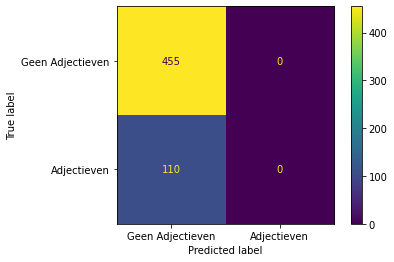

In [194]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)


### Approach 1: Tf-Idf
With tf-idf or just a count vectorizer, we might already achieve quite a good result, since it just needs to learn some adjectives.


f-score: 0.4999999999999999
Confusion matrix: 
[[412  43]
 [ 59  51]]
TP+TN=463
FP+FN=102


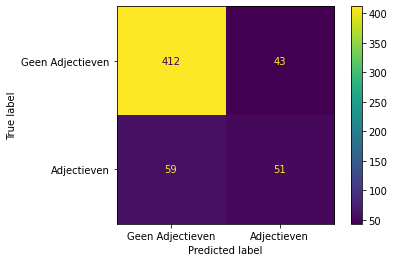

In [195]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

Better than predicting the most occuring, but still quite some room for imporvement.

In [196]:
print(show_most_informative_features(model, n=10))

1.8384   schaamteloze    -1.3079           hand
1.7318          jonge    -1.2329            was
1.6012        ernstig    -1.2276          nemen
1.5918      onbekende    -1.1940  wateroverlast
1.5751   opmerkelijke    -1.1843           waar
1.5269      kwetsbare    -1.1787            als
1.4526      personage    -1.1237            wat
1.4203   supersterren    -1.0946          amper
1.3680          lieve    -1.0766           zijn
1.3582    mysterieuze    -1.0617           voor


The positive terms are as expected mainly adjectives (for some reason is "wereld" also in the positives list). Zijn is probably an important negative, because words aren't an adjective then but an adverb.

f-score: 0.44176706827309237
Confusion matrix: 
[[371  84]
 [ 55  55]]
TP+TN=426
FP+FN=139


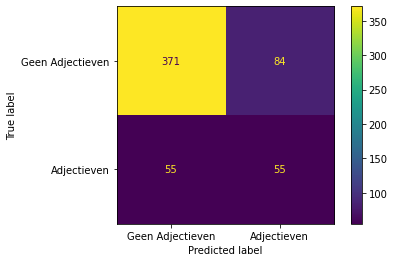

In [197]:
from sklearn.feature_extraction.text import CountVectorizer

model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

Since it only needs one adjective to be correct, I would've expected that CountVectorizer gave the same results as Tf-Idf vectorizer, but that's not the same. CountVectorizer perfoms worse than predicting the most occuring class.

### Approach 2: Stemmer
Let's see if a stemmer makes any difference:

f-score: 0.47115384615384615
Confusion matrix: 
[[406  49]
 [ 61  49]]
TP+TN=455
FP+FN=110


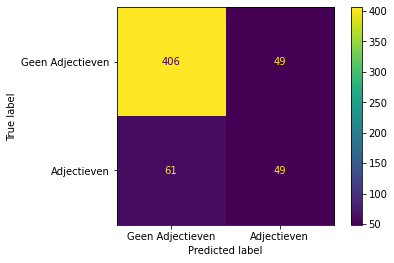

In [198]:
from nltk.stem.snowball import DutchStemmer

stemmer = DutchStemmer()
analyzer = CountVectorizer().build_analyzer()

model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=lambda x: (stemmer.stem(w) for w in analyzer(x)))),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

This leads to slightly worse results than just Tf-Idf without stemmer. This might probably be because adjectives might share the same stem as a related noun (e.g. "Liefde").

### Approach 3: nltk wordnet

In [199]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('tagsets')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arnod\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arnod\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\arnod\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [200]:
from nltk.corpus import wordnet as wn

words = ['huis', 'rode', 'groot', 'mooi', 'liefde']

def print_word_type(word):
    synsets = wn.synsets(word, lang="nld")
    print(f"{word}: {[synset.pos() for synset in synsets]}")

for w in words:
    print_word_type(w)

huis: ['n', 'n', 'n', 'n', 'n']
rode: ['n']
groot: ['n', 'n']
mooi: []
liefde: ['n', 'n']


This doesn't seem to work. It doesn't even have a matching definition for "mooi". Let's check in english.

In [201]:
words = ['house', 'red', 'big', 'pretty', 'love']
[print(f"{w}: {[synset.pos() for synset in wn.synsets(w, lang='eng')]}") for w in words]

house: ['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'v', 'v']
red: ['n', 'n', 'n', 'n', 's', 's', 's']
big: ['a', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'r', 'r', 'r', 'r']
pretty: ['s', 's', 'r']
love: ['n', 'n', 'n', 'n', 'n', 'n', 'v', 'v', 'v', 'v']


[None, None, None, None, None]

It's unclear what all the tags are. [Stackoverflow](https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk) contains a list of nltk tags, but this are different tags than the ones we have.

In [202]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

Also here, the ones we have are different. However it isn't able to give correct dutch tags, so let's skip this method. Let's look back at [the site containing some dutch models](https://dutch-nlp-resources.readthedocs.io/en/latest/models.html) to see if there's something relevant in there.

### Approach 3: SpaCy
Let's try sentence analysis with SpaCy. I'm not sure whether this will work, since new headlines are most of the time not complete semantically correct sentences. Let's start with testing it in english. In order to download the package, you first have to execute following command:
```bash
python -m spacy download en_core_web_sm
```

In [203]:
from pprint import pprint
import spacy
nlp = spacy.load('en_core_web_sm')
parsed = nlp(u"My dog has blue eyes and fluffy fur.")
# pprint([(x.text,x.pos_,x.dep_,[(x.text,x.dep_) for x in list(x.children)]) for x in parsed]) # Children
# pprint([(x.text,x.pos_,x.dep_,[(x.text,x.dep_) for x in list(x.ancestors)]) for x in parsed]) # Ancestors
pprint([(x.text,x.pos_) for x in parsed])

[('My', 'PRON'),
 ('dog', 'NOUN'),
 ('has', 'VERB'),
 ('blue', 'ADJ'),
 ('eyes', 'NOUN'),
 ('and', 'CCONJ'),
 ('fluffy', 'ADJ'),
 ('fur', 'NOUN'),
 ('.', 'PUNCT')]


Let's now try something more headline like:

In [204]:
pprint([(x.text,x.pos_) for x in nlp(u"Blue eyed dog lost")])

[('Blue', 'ADJ'), ('eyed', 'ADJ'), ('dog', 'NOUN'), ('lost', 'VERB')]


Also works as expected. Let's try with a dutch sentence. The dutch spacy models can be found [here](https://spacy.io/models/nl). Again, install the model first (I'll just use the small model):
```bash
python -m spacy download nl_core_news_sm
```

In [205]:
nlp = spacy.load('nl_core_news_sm')
pprint([(x.text, x.pos_) for x in nlp(u"Mijn hond heeft blauwe ogen en een kleine koe.")]) # Hahaha, no idea where the little cow comes from, but GitHub copilot suggested it, so let's keep it

[('Mijn', 'PRON'),
 ('hond', 'NOUN'),
 ('heeft', 'AUX'),
 ('blauwe', 'ADJ'),
 ('ogen', 'NOUN'),
 ('en', 'CCONJ'),
 ('een', 'DET'),
 ('kleine', 'ADJ'),
 ('koe', 'NOUN'),
 ('.', 'PUNCT')]


Cool, seems to work!

In [206]:
def contains_adj(headline):
    return any(x.pos_ == 'ADJ' for x in nlp(headline))

print(contains_adj(u"Man verdrinkt in zee"))
print(contains_adj(u"Man verdrinkt in wilde zee"))

False
True


f-score: 0.37827715355805247
Confusion matrix: 
[[132 323]
 [  9 101]]
TP+TN=233
FP+FN=332


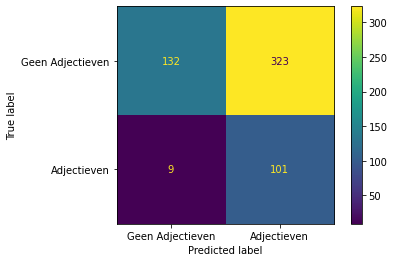

In [207]:
prediction = np.vectorize(contains_adj)(valid_x)
evaluate(valid_y, prediction)

Strangely, there are a lot of false positives, let's check some of them:

In [208]:
# False positives
prediction = np.vectorize(contains_adj)(train_x)
[print(headline) for headline in train_x[(train_y == 0) & (prediction != train_y)][:5]]

Deze man rijdt letterlijk zijn gras af, maar of dat nu de meeste effectieve manier is...
Na 26 jaar zonder ongeval mag Sabine door haar bionische hand plots niet meer met haar auto rijden
Mark Zuckerberg ontwijkt vakkundig netelige vragen van Europees Parlement
Drie jaar cel gevorderd voor man die Julie (22) doodreed en vluchtte: "We zitten bijna bij moord"
Mee met de Queen in haar trein: Meghan mag, Kate (nog) niet


[None, None, None, None, None]

Hmm, all of those actually contain adjectives. I managed to find a better description in the paper:
> Bij het analyseren voor dit onderdeel focusten we op  specifieke, veelzeggende adjectieven die enkel in de ene kop van de test gebruikt werden en niet in de andere (bv.‘Internethype 'uit rijdende auto springen en  dansje  doen'  loopt  uit  de  hand’ tegenover ‘Levensgevaarlijkeinternethype  waait  over  uit  VS’).

So it must be adjectives that are "veelzeggend" and not in the other headline. We're currently seeing each sentence completely seperately, so SpaCy isn't really useful here. In the the negative example, there is also an adjective "rijdende".


## Eigennamen
### Details
> Door een eigennaam van een betrokken persoon te gebruiken  in  een  titel,  in  plaats  van  een generieke benoeming, voelen de lezers sneller een band tussen henzelfen  de  besproken  persoon,omdat  de  lezers het  gevoel  hebben  dat  ze  de  persoon  in  kwestie kennen, waardoor de lezers sneller zouden klikken.
### Example
> 'Temptation'-Yana krijgt vier maanden effectieve celstraf na handtasdiefstalVs. ‘Temptation  Island’-verleidstermoet   vier maanden naar gevangenis
### Data

In [209]:
import pandas as pd
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Eigennamen'])
train_y.value_counts()

0    1519
1     173
Name: Eigennamen, dtype: int64

### Metrics
As baseline

In [210]:
from sklearn import metrics

def evaluate(target, predicted):
    display_labels = ['Geen Eigennamen', 'Eigennamen']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()

### Approach 0: Always predict most occuring class

f-score: 0.0
Confusion matrix: 
[[511   0]
 [ 54   0]]
TP+TN=511
FP+FN=54


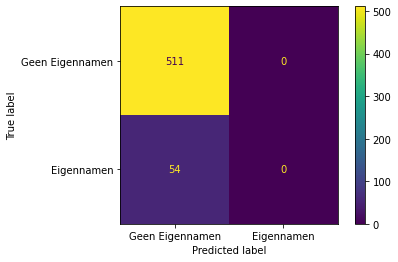

In [211]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)

### Approach 1: Tf-Idf

f-score: 0.6857142857142857
Confusion matrix: 
[[496  15]
 [ 18  36]]
TP+TN=532
FP+FN=33


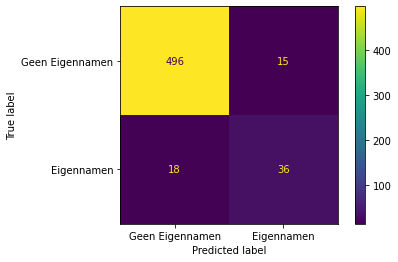

In [212]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

As expected, Tf-Idf works better. However, it's probably overfitting to names that are currently in the news. In a few years, other names will be used and our  model won't recognize those. So let's also try another approach.

### Approach 2: SpaCy
Let's see whether spacy can also recognize proper names.

In [213]:
import spacy
from pprint import pprint
nlp = spacy.load('nl_core_news_sm')
pprint([(x.text,x.pos_,x.dep_,[(x.text,x.dep_) for x in list(x.children)]) for x in nlp(u"Zanger Arno overleden")])

[('Zanger', 'NOUN', 'nsubj', [('Arno', 'appos')]),
 ('Arno', 'PROPN', 'appos', []),
 ('overleden', 'VERB', 'ROOT', [('Zanger', 'nsubj')])]


Seems to already give a label to proper pronouns. To now what each part-of-speech (pos) tag means, you can take a look at [this page](https://v2.spacy.io/api/annotation).
Let's now create a similar function as for adjectives, but now for pronouns:

In [214]:
def contains_pronoun(headline):
    return any(x.pos_ == 'PROPN' for x in nlp(headline))

print(contains_pronoun(u"Zanger Arno overleden"))
print(contains_pronoun(u"Belgische rockzanger overleden"))

True
False


f-score: 0.2420091324200913
Confusion matrix: 
[[180 331]
 [  1  53]]
TP+TN=233
FP+FN=332


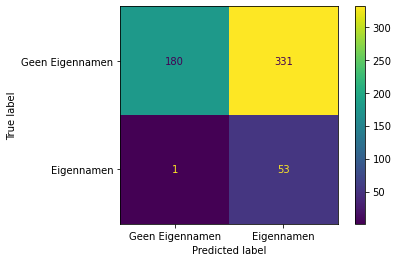

In [215]:
prediction = np.vectorize(contains_pronoun)(valid_x)
evaluate(valid_y, prediction)

There are a lot more false postivies than expected. Let's take a look:

In [216]:
# False positives
prediction = np.vectorize(contains_pronoun)(train_x)
[print(headline) for headline in train_x[(train_y == 0) & (prediction != train_y)][:5]]

NASA geeft nieuwe resultaten vrij: was er ooit leven op Mars?
Ging Trump te ver met speech?: "Hij zette eigen diensten in het hemd. Dat is zelfs voor de VS ongezien"
Kaasmeester Van Tricht proeft croque-monsieurs. "Nergens stapte ik ontevreden weg, maar dé topcroque vond ik niet"
Kim Jong-un laat belangrijke officier executeren (en dat is lang niet de eerste keer)
14 mensen naar ziekenhuis tijdens match tussen Antwerp en Sint-Truiden door knalvuurwerk


[None, None, None, None, None]

Some seem wrongly labeled in the dataset (e.g. "Lukaku" and "Whitney Houston" are clearly proper nouns).

In [217]:
test_sentence = "Deze Vlamingen onderzoeken of we kunnen wonen op Mars"
parsed = nlp(test_sentence)
pprint(list([(x.text, x.pos_, x.tag_) for x in parsed]))

[('Deze', 'DET', 'VNW|aanw|det|stan|prenom|met-e|rest'),
 ('Vlamingen', 'PROPN', 'N|eigen|mv|basis'),
 ('onderzoeken', 'VERB', 'WW|inf|vrij|zonder'),
 ('of', 'SCONJ', 'VG|onder'),
 ('we', 'PRON', 'VNW|pers|pron|nomin|red|1|mv'),
 ('kunnen', 'AUX', 'WW|pv|tgw|mv'),
 ('wonen', 'VERB', 'WW|inf|vrij|zonder'),
 ('op', 'ADP', 'VZ|init'),
 ('Mars', 'PROPN', 'N|eigen|ev|basis|zijd|stan')]


In [218]:
pprint(list([(x.text, x.pos_, x.tag_) for x in nlp("Zanger Arno overleden")]))

[('Zanger', 'NOUN', 'N|soort|ev|basis|zijd|stan'),
 ('Arno', 'PROPN', 'N|eigen|ev|basis|onz|stan'),
 ('overleden', 'VERB', 'WW|vd|vrij|zonder')]


"Vlamingen" and names of planets are also proper nouns. It's unclear which proper nouns should count (since some names like above also weren't taken into account). Let's keep the tf-idf approach.

## Betrekking (Aanspreking van de lezer)
### Details
> Wanneer    lezers    worden    aangesproken    in    de krantenkop,  voelen  ze  zich  al  meer  geroepen  en geneigd  om  het  artikel  te  lezen,  omdat  ze  zich betrokken voelen bij de zaak.
### Example
> Onze hittetips: hoe raak *ik* deze dagen in slaap? Wat helpt tegen *okselvijvers*?
### Data

In [219]:
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Betrekking'])
train_y.value_counts()

0    1574
1     118
Name: Betrekking, dtype: int64

### Metrics
As baseline

In [220]:
from sklearn import metrics

def evaluate(target, predicted):
    display_labels = ['Geen Betrekking', 'Betrekking']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()

### Approach 0: Always predict most occuring class

f-score: 0.0
Confusion matrix: 
[[522   0]
 [ 43   0]]
TP+TN=522
FP+FN=43


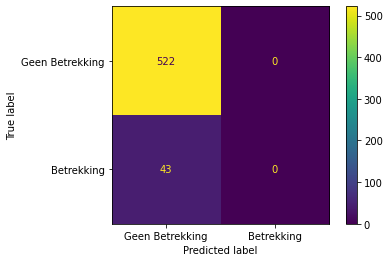

In [221]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)

### Approach 1: Tf-Idf

f-score: 0.6216216216216216
Confusion matrix: 
[[514   8]
 [ 20  23]]
TP+TN=537
FP+FN=28


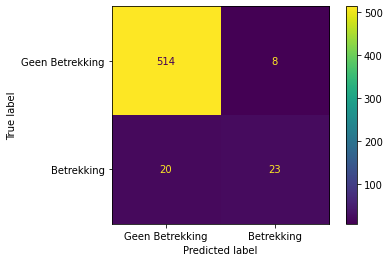

In [222]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

Slightly better than the baseline, let's take a look at the important words:

In [223]:
import operator

def show_most_informative_features(model, vectorizer=None, text=None, n=10):
    # Function copied from stackoverflow: https://stackoverflow.com/questions/48401148/document-classification-with-scikit-learn-most-efficient-way-to-get-the-words

    # Extract the vectorizer and the classifier from the pipeline
    if vectorizer is None:
        vectorizer = model.named_steps['vectorizer']
    else:
        vectorizer.fit_transform([text])

    classifier = model.named_steps['classifier']
    feat_names = vectorizer.get_feature_names_out()

    # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {}.".format(
                classifier.__class__.__name__
            )
        )

    # Otherwise simply use the coefficients
    tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], feat_names),
        key=operator.itemgetter(0), reverse=True
    )

    # Get the top n and bottom n coef, name pairs
    topn = zip(coefs[:n], coefs[:-(n + 1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append(
            "Classified as: {}".format(model.predict([text]))
        )
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(
                cp, fnp, cn, fnn
            )
        )

    return "\n".join(output)

In [224]:
print(show_most_informative_features(model))

3.2089             je    -0.9659            man
2.3947           hier    -0.8763          trump
2.2744             uw    -0.7374            bij
1.8665        herkent    -0.7344             cd
1.5503            kan    -0.6934           rare
1.5263           baan    -0.6934          kuren
1.4696            jij    -0.6934      kruispunt
1.4602       vergeten    -0.6420           jaar
1.4447lievelingsfilms    -0.6347        weekend
1.3537          haten    -0.6143             is


### Approach 2: Tf-Idf + Stemming

f-score: 0.5945945945945946
Confusion matrix: 
[[513   9]
 [ 21  22]]
TP+TN=535
FP+FN=30


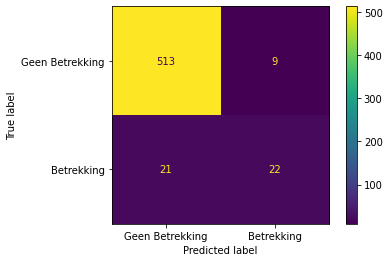

In [225]:
from nltk.stem.snowball import DutchStemmer

stemmer = DutchStemmer()
analyzer = CountVectorizer().build_analyzer()

model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=lambda x: (stemmer.stem(w) for w in analyzer(x)))),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

Slightly worse than without stemming.

## Voor + Achternaam
### Details
> Hier is de vraag of voor bekende mensen de volledige naam  (voor-en achternaam) in de titel beter werkt dan enkel hun achternaam.
### Example
> Beluister hier de eerste audiocolumn van Nico Dijkshoorn: “Mis ik Nederland? Geen moment” Vs. Dijkshoornscherp voor eigen natie in nieuwe WK-audiocolumn:   "Of   ik   Oranje   mis?   Geen moment"

### Data

In [226]:
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Voor+Achternaam'])
train_y.value_counts()

0    1537
1     155
Name: Voor+Achternaam, dtype: int64

### Metrics

In [227]:
from sklearn import metrics


def evaluate(target, predicted):
    display_labels = ['Geen Voornaam + Achternaam', 'Voornaam + Achternaam']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()

### Approach 0: Always predict most occuring class

f-score: 0.0
Confusion matrix: 
[[503   0]
 [ 62   0]]
TP+TN=503
FP+FN=62


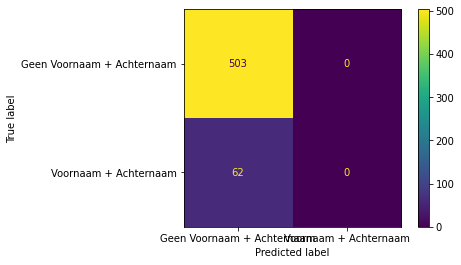

In [228]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)

### Approach 1: Tf-Idf
This might have the same problem as with proper nouns, that we're overfitting on the names currently in the news and not the ones that will be in the future in the news.

f-score: 0.7758620689655172
Confusion matrix: 
[[494   9]
 [ 17  45]]
TP+TN=539
FP+FN=26


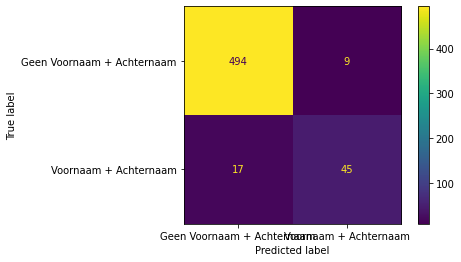

In [229]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

It will probably be a challenge to improve those results.

In [230]:
print(show_most_informative_features(model))

2.2646         markle    -1.1546           maar
2.2397           marc    -0.7410            dan
1.9572           bart    -0.7266           deze
1.6689        melania    -0.7072           onze
1.5847       philippe    -0.6632        bekende
1.5635         herman    -0.6547          vrede
1.5319           hein    -0.6343             zo
1.4550        mertens    -0.6162            uit
1.4513        dexters    -0.6117          vrouw
1.4513          tanja    -0.6101           legt


As expected, it focuses mainly on currently popular names. Since this only looks word per word, Harry is appearantly used less without a last name. Let's solve the second part using 2-grams or 3-grams:

f-score: 0.7454545454545455
Confusion matrix: 
[[496   7]
 [ 21  41]]
TP+TN=537
FP+FN=28


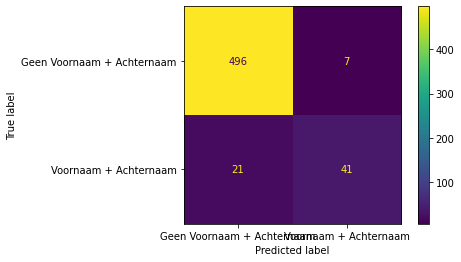

In [231]:
model = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

Strangely, this is slightly worse.

In [232]:
print(show_most_informative_features(model))

1.5134         markle    -0.9495           maar
1.5134  meghan markle    -0.5729             op
1.4747           marc    -0.5540           deze
1.2637         meghan    -0.5407            dan
1.1608           bart    -0.5384            uit
1.1608        bart de    -0.5265           onze
1.1403         herman    -0.4926      en meghan
1.1392          deelt    -0.4849          vrouw
1.1166           hein    -0.4574             zo
1.1166hein vanhaezebrouck    -0.4531             al


Strangely it still focusses also on single names and doesn't always take the pair into account.

### Approach 2: SpaCy
SpaCy was excellent in detecting proper nouns. We might be able to check for two consequtive proper nouns.

In [233]:
import spacy
from pprint import pprint

nlp = spacy.load('nl_core_news_sm')
pprint([(x.text, x.pos_, x.dep_, [(x.text, x.dep_) for x in list(x.children)]) for x in nlp(u"Zanger Arno Hintjes overleden")])

[('Zanger', 'NOUN', 'ROOT', []),
 ('Arno', 'PROPN', 'amod', []),
 ('Hintjes', 'NOUN', 'obj', [('Arno', 'amod')]),
 ('overleden', 'VERB', 'ROOT', [('Hintjes', 'obj')])]


Quite strange "Hintjes" is not a proper noun.

In [234]:
pprint([(x.text, x.pos_, x.text) for x in nlp(u"Meghan Markles papa in tranen toen prins Charles zijn dochter weggaf: \"Ik wenste dat ik daar was\"")])

[('Meghan', 'PROPN', 'Meghan'),
 ('Markles', 'PROPN', 'Markles'),
 ('papa', 'VERB', 'papa'),
 ('in', 'ADP', 'in'),
 ('tranen', 'NOUN', 'tranen'),
 ('toen', 'SCONJ', 'toen'),
 ('prins', 'NOUN', 'prins'),
 ('Charles', 'PROPN', 'Charles'),
 ('zijn', 'PRON', 'zijn'),
 ('dochter', 'NOUN', 'dochter'),
 ('weggaf', 'VERB', 'weggaf'),
 (':', 'PUNCT', ':'),
 ('"', 'PUNCT', '"'),
 ('Ik', 'PRON', 'Ik'),
 ('wenste', 'VERB', 'wenste'),
 ('dat', 'SCONJ', 'dat'),
 ('ik', 'PRON', 'ik'),
 ('daar', 'ADV', 'daar'),
 ('was', 'VERB', 'was'),
 ('"', 'PUNCT', '"')]


In [235]:
def contains_consecutive_pronouns(headline):
    previous_propn = False
    for x in nlp(headline):
        if x.pos_ == 'PROPN' and previous_propn:
            return True
        previous_propn = x.pos_ == 'PROPN'
    return False

print(contains_consecutive_pronouns(u"Meghan Markles papa in tranen toen prins Charles zijn dochter weggaf"))
print(contains_consecutive_pronouns(u"Meghans papa in tranen toen prins Charles zijn dochter weggaf"))

True
False


f-score: 0.6369426751592356
Confusion matrix: 
[[458  45]
 [ 12  50]]
TP+TN=508
FP+FN=57


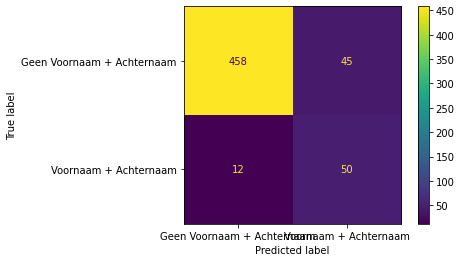

In [236]:
prediction = np.vectorize(contains_consecutive_pronouns)(valid_x)
evaluate(valid_y, prediction)

Worse (for this test, maybe better when the test is on headlines from the future), let's see what the false positives are:

In [237]:
# False positives
valid_x[(valid_y == 0) & (prediction != valid_y)][:5]

1348    Vakbond: "We pleiten voor het Amerikaanse syst...
2219    Van l'Origine du Monde tot een piemel in het M...
247     EXCLUSIEF. Onze reporter op de Main Stage van ...
1265    "N-VA kreeg een marsorder om niets over de Rod...
1889    Queen Elizabeth behandelt Meghan Markle heel a...
Name: Headline , dtype: object

Things like "Dominicaanse Repbuliek", "Rock Werchter", "Temptation Island" are false positives. Let's see if we can solve this by combining this function with Tf-Idf.

### Approach 3: Tf-Idf + Consecutive proper nouns (SpaCy)
Let's combine those features:

f-score: 0.8205128205128205
Confusion matrix: 
[[496   7]
 [ 14  48]]
TP+TN=544
FP+FN=21


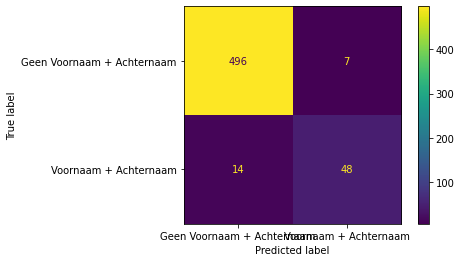

In [238]:
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from spicy import sparse

class ConsecutiveProperNounFinder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        return sparse.csr_matrix(X_.apply(contains_consecutive_pronouns)).transpose() # It took way more time than needed just to find out I needed to convert this to a csr matrix

model = Pipeline([
    ('union', FeatureUnion([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 1))),
        ('consecutive_pronouns', ConsecutiveProperNounFinder())
    ])),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

Adding this as an extra feature gives better results, as expected. Let's see what the important words are now:

In [240]:
print(show_most_informative_features(model, vectorizer=model.named_steps['union'].transformer_list[0][1]))

AttributeError: 'NoneType' object has no attribute 'lower'

Some words related to "Rode Duivels" (rode, duivels, doelman ...). Let's try 2-grams again:

f-score: 0.8448275862068966
Confusion matrix: 
[[498   5]
 [ 13  49]]
TP+TN=547
FP+FN=18


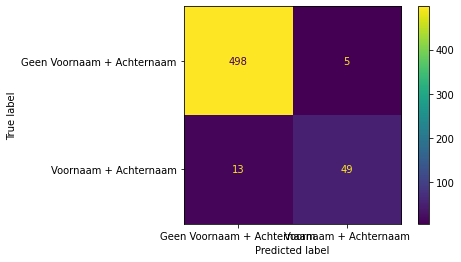

In [241]:
model = Pipeline([
    ('union', FeatureUnion([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
        ('consecutive_pronouns', ConsecutiveProperNounFinder())
    ])),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

In [242]:
print(show_most_informative_features(model, vectorizer=model.named_steps['union'].transformer_list[0][1]))

AttributeError: 'NoneType' object has no attribute 'lower'

Still strange that we have in the positive column e.g. "demi lovato", "demi" and "lovato". Even when it's only the first name or last name (and thus not together), it has a positive impact.*

Since 2-grams gave a slight increase, let's also check 3-grams but I don't think this will give better results:

f-score: 0.8347826086956522
Confusion matrix: 
[[498   5]
 [ 14  48]]
TP+TN=546
FP+FN=19


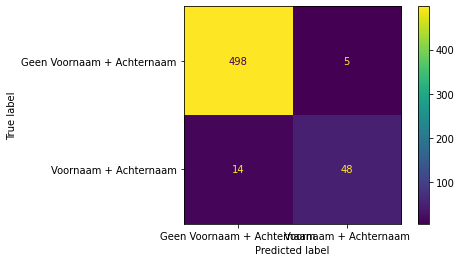

In [243]:
model = Pipeline([
    ('union', FeatureUnion([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),
        ('consecutive_pronouns', ConsecutiveProperNounFinder())
    ])),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

As expected, slightly worse results now.

\* This problem might be solved by only allowing 2-grams and thus not keeping the 1-grams:

f-score: 0.831858407079646
Confusion matrix: 
[[499   4]
 [ 15  47]]
TP+TN=546
FP+FN=19


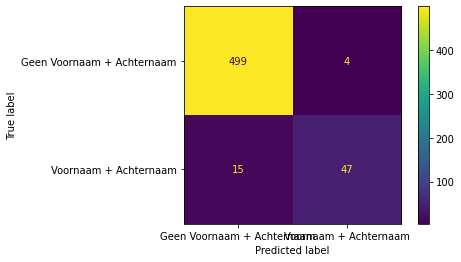

In [244]:
model = Pipeline([
    ('union', FeatureUnion([
        ('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
        ('consecutive_pronouns', ConsecutiveProperNounFinder())
    ])),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

In [245]:
print(show_most_informative_features(model, vectorizer=model.named_steps['union'].transformer_list[0][1]))

AttributeError: 'NoneType' object has no attribute 'lower'

This model perfoms slightly worse than also keeping 1-grams into account. However I think it might perform better when it sees completely new names (e.g. with headlines from 10 years ago or 10 years in the future (or when e.g. more articles with "Demi" instead of "demi lovato" appears (because in 10 years, names like "Rode Duivels" and "Tempatation Island" probably won't be that interesting anymore).
A strange thing to notice is "president trump" as positive word, even though it's only his last name. This is because some overfitting. "President Trump" occurs only once in the dataset and "Kim Jong-Un" is mentioned in that same headline with his first and last name: "President Trump annuleert historische ontmoeting met Kim Jong-un"

## Cijfers
### Details
> Het  gebruik  van  cijfers  in  koppen  maakt  de  inhoud van het artikel voorspelbaar voor de lezers. Het geeft hen  zekerheid  waardoor  ze  weten  wat  ze  kunnen verwachten. Cijfers kunnen krantenkoppen interessanter  maken,  vooral  wanneer  het  gaat  om grote getallen (1). Ook kunnen cijfers inspelen op de gevoelens van mensen door bijvoorbeeld de leeftijd weer tegeven (2).
### Example
> (1) Iedereen dacht dat 313kinderen ziek werden door zijn lasagne, maar dat klopt niet: "Wat dan wél?"(2) Kranige  oma (93)bewijst  dat  er  op  angst overwinnen geen leeftijd staat


In [246]:
### Data

In [247]:
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Cijfers'])
train_y.value_counts()

0    1367
1     325
Name: Cijfers, dtype: int64

### Metrics

In [248]:
from sklearn import metrics


def evaluate(target, predicted):
    display_labels = ['Geen Cijfers', 'Cijfers']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()


### Approach 0: Always predict most occuring class

f-score: 0.0
Confusion matrix: 
[[447   0]
 [118   0]]
TP+TN=447
FP+FN=118


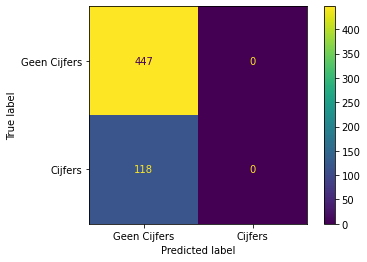

In [249]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)

### Approach 1: Tf-Idf
This will probably overfit on the numbers we've already seen

f-score: 0.7876106194690264
Confusion matrix: 
[[428  19]
 [ 29  89]]
TP+TN=517
FP+FN=48


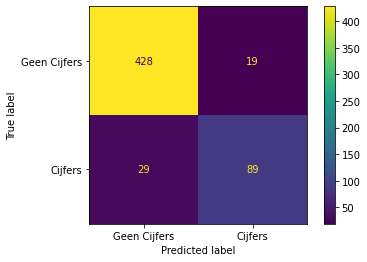

In [250]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

In [251]:
print(show_most_informative_features(model))

3.1423           jaar    -1.1316         zitten
3.0459           euro    -1.0899            die
2.6591            000    -0.9439         moeten
2.1748         graden    -0.8355tigerkidnapping
2.0285             30    -0.8353          trump
1.7737             12    -0.8102           tijd
1.7631             10    -0.7963           onze
1.7344             25    -0.7828           daar
1.6574          meter    -0.7780      opgelicht
1.6572            500    -0.7501             zo


I didn't expect words like "jaar", "euro" or "graden" here, but it's quite a smart solution to the problem. Also "000" is interesting, since it get's seen as a seperate token in large number (because a "." means new token, e.g. 7.000.000 -> "7", "000" and "000").

### Approach 2: Char grams
Since a lot of number (e.g. "zevenhonderddrieëntwintig") consist of existing number, we can try to use char grams to predict whether there is a number. "Char-wb" stays between word boundries.


f-score: 0.8434782608695652
Confusion matrix: 
[[432  15]
 [ 21  97]]
TP+TN=529
FP+FN=36


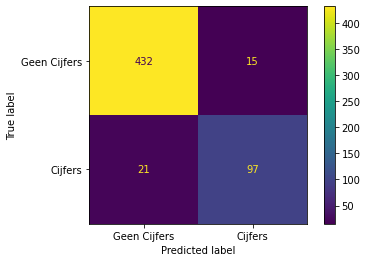

In [252]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer="char_wb", ngram_range=(1, 6))), # 2 e.g. -ig, 6 e.g. twaalf; 1 e.g. 1 (the number 1)
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

In [253]:
print(show_most_informative_features(model))

3.7885              0    -0.5448              z
3.0864              2    -0.5373              e
2.3293              1    -0.5207             u 
2.3201              3    -0.5189              p
2.3103             0     -0.5038            zo 
1.9661                   -0.4782              '
1.8053             )     -0.4627             on
1.8000              (    -0.4569             tr
1.8000              (    -0.4408             e 
1.8000              )    -0.4387             t 


"jaar" stays something with a large positive impact.

### Approach 3: Own function
Our function from earlier checks whether there is any digit or whether it contains a number as text (based on a list of known numbers). However as warned for earlier, this kind of functions are prone to overfitting, but I want to test it anyway to compare it with our char-gram model.

f-score: 0.8528301886792453
Confusion matrix: 
[[413  34]
 [  5 113]]
TP+TN=526
FP+FN=39


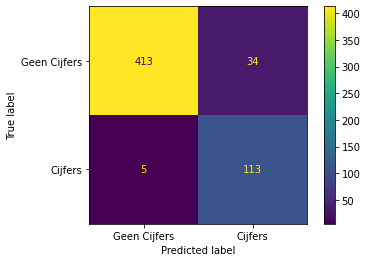

In [254]:
predict = np.vectorize(contains_number_or_number_word)(valid_x)
evaluate(valid_y, predict)

The f-score is slightly higher and the number of correct predictions is slightly lower. However because of the possible danger of overfitting, the previous model is still prefered.

## Quotes
### Details
> Een  citaat  benadrukt  een  belangrijk  deel  van  het artikel,  waardoor  het  de  lezers  prikkelt  om  ook  het achterliggende verhaal te willen lezen.
### Example
> Pakkende  getuigenis  van  ex-gevangene: "In  de cel hingen de muren vol stront"
### Data

In [5]:
import pandas as pd
from sklearn import model_selection

df = pd.read_excel('headline-data/Dataverwerking.xlsx', sheet_name='Verwerking')
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Headline '], df['Quotes'])
train_y.value_counts()

0    1110
1     582
Name: Quotes, dtype: int64

### Metrics

In [11]:
from sklearn import metrics


def evaluate(target, predicted):
    display_labels = ['Geen Quotes', 'Quotes']

    cm = metrics.confusion_matrix(target, predicted)
    f1 = metrics.f1_score(target, predicted)

    print(f"f-score: {f1}")
    print(f"Confusion matrix: \n{cm}")
    print(f"TP+TN={cm[0, 0] + cm[1, 1]}")
    print(f"FP+FN={cm[0, 1] + cm[1, 0]}")
    metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()

### Approach 0: Always predict most occuring class

f-score: 0.0
Confusion matrix: 
[[394   0]
 [171   0]]
TP+TN=394
FP+FN=171


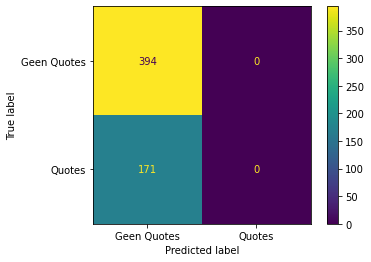

In [12]:
import numpy as np

most_occuring = np.bincount(train_y).argmax()
predictions = np.full(len(valid_y), most_occuring)
evaluate(valid_y, predictions)

### Approach 1: All headlines containing quotation mark

In [13]:
def contains_quotation_mark(text):
    return '"' in text

f-score: 0.9418282548476454
Confusion matrix: 
[[374  20]
 [  1 170]]
TP+TN=544
FP+FN=21


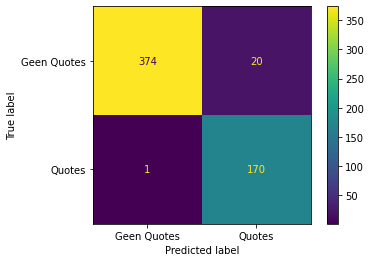

In [14]:
predict = np.vectorize(contains_quotation_mark)(valid_x)
evaluate(valid_y, predict)

As expected, this trivial solutions performs quite good. Let's see at the misclassifications in our training data:

In [19]:
# False positives:
predict = np.vectorize(contains_quotation_mark)(train_x)
train_x[(predict != train_y) & (predict == 1)][:5]

654     Paris Hilton vraagt haar fans iets te vertelle...
983     Vlaamse steden zetten zich schrap voor "risico...
1296    FBI verwittigt Belgische politie: minderjarige...
2171    "Niet goed genoeg" als straatmuzikant, maar Er...
1436     Archeologen doen "dramatische vondst" in Pompeii
Name: Headline , dtype: object

## Approach 2: Tf-Idf + Quotation as feature
This probably won't work, since the missed quotations don't have a cler correlation.


f-score: 0.9548022598870056
Confusion matrix: 
[[380  14]
 [  2 169]]
TP+TN=549
FP+FN=16


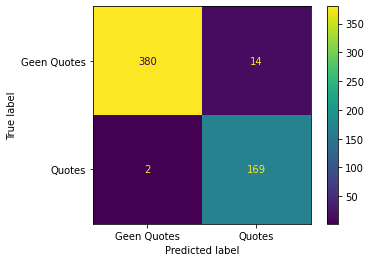

In [23]:
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from spicy import sparse
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
from sklearn import svm

class QuotesFinder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        return sparse.csr_matrix(X_.apply(contains_quotation_mark)).transpose()

model = Pipeline([
    ('union', FeatureUnion([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 1))),
        ('consecutive_pronouns', QuotesFinder())
    ])),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

This still gave a slight increase.

### Approach 3: Tf-Idf + Quotation as feature + Words in quotation as feature
The words inside the quotation brackets might also be an interesting feature.

In [46]:
import re

def get_quotation_words(text):
    return re.findall(r'"([^"]*)"', text)

def get_num_words(text):
    return len(text.split())

def get_quotation_word_count(text):
    # Returns the #words of the longest quote in the text
    quotes = get_quotation_words(text)
    quotes_length = list(map(get_num_words, quotes))
    return max(quotes_length) if quotes_length else 0

sentence = 'En hij zei "Leef!", "Alsof het je laatste dag is!"' # Should return 6, since the longest quote has 6 words
get_quotation_word_count(sentence)

6

In [47]:
class LongestQuotationLengthCounter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        return sparse.csr_matrix(X_.apply(get_quotation_word_count)).transpose()

C:\Users\arnod\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


f-score: 0.9712643678160918
Confusion matrix: 
[[386   8]
 [  2 169]]
TP+TN=555
FP+FN=10


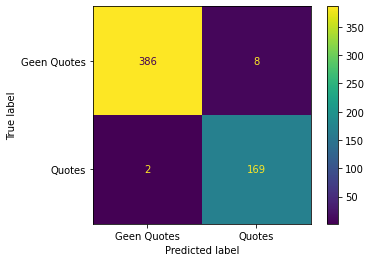

In [51]:
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('union', FeatureUnion([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 1))),
        ('consecutive_pronouns', QuotesFinder()),
        ('longest_quotation_length', Pipeline([
            ('counter', LongestQuotationLengthCounter()),
            # ('scaler', StandardScaler(with_mean=False)) # Scale to 0-1 (with_mean was required because sparsematrix) (with or without scaler didn't make difference in test results)
        ]))
    ])),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

Let's see what are still the remaining misclassifications in our training set:

In [52]:
# False positives
predict = model.predict(train_x)
train_x[(predict != train_y) & (predict == 1)][:5]

1074    Donald Trump en Kim Jong-un hebben een "geweld...
Name: Headline , dtype: object

In [53]:
# False negatives
predict = model.predict(train_x)
train_x[(predict != train_y) & (predict == 0)][:5]

Series([], Name: Headline , dtype: object)

It performs very good on the training set (of course, because it's trained on this set)

### Approach 4: Tf-Idf + Quotation as feature + Words in quotation as feature + Whether there is a double point in the headline as feature
Adding whether there is a double point in a headline might also be an interesting feature (since quotes are often preceeded with that)

In [55]:
class DoublePointFinder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        return sparse.csr_matrix(X_.apply(lambda x: ":" in x)).transpose()

f-score: 0.9767441860465116
Confusion matrix: 
[[389   5]
 [  3 168]]
TP+TN=557
FP+FN=8


C:\Users\arnod\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


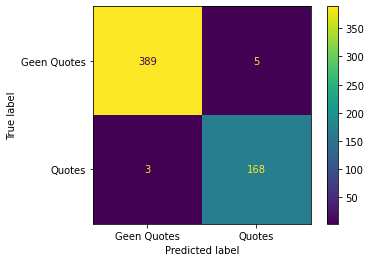

In [57]:
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('union', FeatureUnion([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 1))),
        ('consecutive_pronouns', QuotesFinder()),
        ('longest_quotation_length', Pipeline([
            ('counter', LongestQuotationLengthCounter()),
            # ('scaler', StandardScaler(with_mean=False)) # Scale to 0-1 (with_mean was required because sparsematrix) (with or without scaler didn't make difference in test results)
        ])),
        ('double_point', DoublePointFinder())
    ])),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

model.fit(train_x, train_y)

prediction = model.predict(valid_x)
evaluate(valid_y, prediction)

Again a slight improvement :)